# LendingClub Project 

## Problem Statement

Imagine you work for a consumer finance company specializing in lending various types of loans to urban customers. When the company receives a loan application, they must make a decision for loan approval based on the applicant’s profile. However, two types of risks are associated with the company’s decision:

1. **Risk of Loss**: If the applicant is likely to repay the loan, not approving the loan results in a loss of business to the company.
2. **Risk of Default**: If the applicant is not likely to repay the loan, approving the loan may lead to a financial loss for the company.

We have been provided with data that contains information about past loan applicants and whether they defaulted on their loans or not. The aim of this analysis is to identify patterns that indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the loan amount, or lending to risky applicants at a higher interest rate.

In this project, we will use Exploratory Data Analysis (EDA) techniques to understand how consumer attributes and loan attributes influence the tendency of default. Our goal is to provide actionable insights that can help the company minimize credit loss and make informed lending decisions.

In this case study, we will use Exploratory Data Analysis (EDA) techniques to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

**Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

- **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)
- **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
- **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

**Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company (and thus in this dataset).

Our aim? To unravel the mysteries hidden in this data, empowering us to make informed decisions and mitigate the risks of lending in the dynamic world of consumer finance.


## 1. Imports and Initial Setup
**Libraries and Setup:**

In [1]:
import numpy as np #numpy: Library for numerical computing, supporting multi-dimensional arrays and mathematical functions.
import pandas as df #pandas: Powerful data manipulation and analysis library, featuring DataFrame and Series structures.
import matplotlib.pyplot as plt #matplotlib.pyplot: Widely-used plotting library, offering a MATLAB-like interface for creating various plots.
import seaborn as sns #seaborn: Statistical data visualization library, simplifying creation of informative graphics.
import datetime as dt #datetime: Python module for manipulating dates, times, and timedeltas in data analysis.
import warnings as warn #warnings: Module for issuing and managing warning messages, with 'ignore' option to suppress warnings.

warn.filterwarnings('ignore') # to ignore the warnings

## 2. Load Data from CSV

To initiate the program, clone the GitHub repository using the following command:

```bash
git clone https://github.com/neginaresh/LendingClubCaseStudy.git
```

Create a folder in the cloned location, specifically inside the "LendingClubCaseStudy" directory, and copy the "loan.csv" file into it:
```bash
mkdir data
cp /source_location/loan.csv /dest_location/LendingClubCaseStudy/data
```



In [2]:
# Load the loan dataset into a DataFrame, skipping bad lines
loan_data = df.read_csv('loan.csv', on_bad_lines='skip', engine="python")

## 3. Data Review

In [3]:
# Displaying the shape, information, and data types of the loan data DataFrame
print("DataFrame Shape:", loan_data.shape)
print("===================================================")
print("DataFrame Information:")
print(loan_data.info())
print("===================================================")
print("Data Types of DataFrame Columns:", loan_data.dtypes)

DataFrame Shape: (39717, 111)
DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
Data Types of DataFrame Columns: id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


## 4. Data Dictionary Review

In [4]:
# Loading all data dictionary values
dict = df.read_excel('Data_Dictionary.xlsx')
dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


## 5. Data Cleaning and Manipulation
   
   ### 5.1 Removing any headers/footers or summary detail rows: 
   #### as that is not the actual data that we need for analysis


In [5]:
# loan Data summary
print("DataFrame Shape:", loan_data.shape) # Print the shape (number of rows and columns) of the loan dataset
loan_data.head() # Display the first 10 rows of the loan dataset

DataFrame Shape: (39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
# From the DataFrame displayed above, we observe that there are no headers or summary rows. 
# Next, let's examine the last few rows to check for footer rows.
loan_data.tail()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# From above analysis we can say that there is no header, footer, Total, Subtotal rows row as well.

total_rows = len(loan_data)  # Calculate the total number of rows in the dataset
print("Total number of rows after checking for headers and footers:", total_rows) # This is the initial number of rows

Total number of rows after checking for headers and footers: 39717


### 5.2 Removing Rows
#### where loan_status = "Current"

In [8]:
# Check for unnecessary rows by counting the occurrences of different loan statuses.
# Check the distribution of loan_status values
print("Distribution of loan_status before removing rows with 'current' status:")
print(loan_data['loan_status'].value_counts())

Distribution of loan_status before removing rows with 'current' status:
loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64


In [9]:
# Filter out rows where loan_status is 'Current', as these represent ongoing loan repayments and cannot contribute to conclusive evidence if the customer will default payments in future.
loan_data = loan_data[loan_data['loan_status']!='Current']


In [10]:
# Print current data statistics after dropping rows with loan_status "CURRENT"

# Check the distribution of loan_status values
print("Distribution of loan_status after removing rows with 'current' status:")
print(loan_data['loan_status'].value_counts())

rows_deleted=((total_rows - len(loan_data))*100)/total_rows

total_rows = len(loan_data)
print("Total number of rows after removing rows with 'current' loan status:", len(loan_data)) ## Total no of rows now.

print("Percentage of rows removed = ", round(rows_deleted, 2),"%")



Distribution of loan_status after removing rows with 'current' status:
loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64
Total number of rows after removing rows with 'current' loan status: 38577
Percentage of rows removed =  2.87 %


In [11]:
# Check for duplicate rows in the dataset
duplicate_rows = len(loan_data[loan_data.duplicated()])

# If there are no duplicate rows, print a message indicating no action needed
if duplicate_rows <= 0:
    print("Duplicate Rows:", duplicate_rows)
    print("No duplicate rows found. No action needed.")
# Otherwise, print a message indicating that some action may be required
else:
    print("Duplicate Rows:", duplicate_rows)
    print("Potential duplicate rows found. Consider further investigation.")


Duplicate Rows: 0
No duplicate rows found. No action needed.


### 5.3 Removing Unnecessary Columns

In [12]:
print("DataFrame Shape:", loan_data.shape) # Print the shape (number of rows and columns) of the loan dataset

DataFrame Shape: (38577, 111)


In [13]:
# To Check the details of columns if the they are nulls or blanks as value.
(loan_data.isnull().sum()*100)/len(loan_data)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [14]:
#There are numerous columns containing only null or blank values, which do not contribute to the analysis. Therefore, we will remove them.

In [15]:
total_na_columns = len(loan_data.columns[loan_data.isna().all()].tolist())
print("Total columns with all NA values: ", total_na_columns)
na_columns = loan_data.columns[loan_data.isna().all()].tolist()
print("List of columns with all NA values:")
na_columns

Total columns with all NA values:  55
List of columns with all NA values:


['next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_

In [16]:
# Removing columns with all rows containing NA values
loan_data = loan_data.dropna(axis=1, how="all")
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [17]:
# Removing rows with all columns containing NA values
loan_data = loan_data.dropna(axis=0, how="all")
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [18]:
# Removing columns representing unique identifiers as they do not contribute to loan analysis

unique_columns = [col for col in loan_data.columns if loan_data[col].nunique() == len(loan_data)]
unique_columns


['id', 'member_id', 'url']

In [19]:
# Removing 'member_id' and 'url' columns as they are not relevant for exploratory data analysis (EDA). 
# We will retain the 'id' column for pivot table creation.

loan_data.drop(['url', 'member_id'], axis=1, inplace=True)

print("DataFrame Shape:", loan_data.shape)

DataFrame Shape: (38577, 54)


In [20]:
# Removing columns containing text or description values as they don't contribute to exploratory data analysis (EDA).

loan_data.drop(columns=['desc','title'],inplace=True)

print("DataFrame Shape:", loan_data.shape)

DataFrame Shape: (38577, 52)


In [21]:
# We'll narrow our analysis to the group level only, so we'll remove the subgroups.
loan_data = loan_data.drop(['sub_grade'], axis=1)

In [22]:
# Removing columns containing post-loan approval behavioral data 
# Behaviour data of the customers are captured post the loan approval
# The data is not available at the time of loan approval and thus cannot be used for calculations

behavioural_cols=['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'application_type','last_pymnt_d','last_credit_pull_d']

loan_data=loan_data.drop(behavioural_cols,axis=1) # Removing columns containing post-loan approval behavioral data

loan_data.nunique().sort_values() # Sorting unique values in columns to analyze data variability

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv                8050
installment                 

In [23]:
# Remove columns with only one unique value
# If a column has the same value across all rows, it is considered constant
# NA values are ignored in determining uniqueness

for column in loan_data.columns:
    if loan_data[column].nunique(dropna=True) == 1:
        print("Removing column with only one unique value:", column)
        loan_data = loan_data.drop(column, axis=1)

print("-------------")
loan_data

Removing column with only one unique value: pymnt_plan
Removing column with only one unique value: initial_list_status
Removing column with only one unique value: collections_12_mths_ex_med
Removing column with only one unique value: policy_code
Removing column with only one unique value: acc_now_delinq
Removing column with only one unique value: chargeoff_within_12_mths
Removing column with only one unique value: delinq_amnt
Removing column with only one unique value: tax_liens
-------------


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,...,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,NaN,NaN,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,...,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,NaN,NaN,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,...,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,NaN,NaN,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,...,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,35.0,NaN,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,...,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,FiSite Research,4 years,...,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,0.0,0.0,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,...,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,5.0,0.0,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,NaN,< 1 year,...,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,0.0,0.0,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,NaN,< 1 year,...,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,0.0,0.0,NaN


In [24]:
# Check the amount of null values in a dataframe and 
# Remove the columns with more than 50% of null values
total_rows = len(loan_data)
for column in loan_data.columns:
    if loan_data[column].isna().mean().round(2) >= 0.50:
        print("Dropping column with more than 50% null values:", column)
        loan_data = loan_data.drop(column, axis=1)

# Displaying the shape of the DataFrame after dropping columns
print("DataFrame shape:", loan_data.shape)

Dropping column with more than 50% null values: mths_since_last_delinq
Dropping column with more than 50% null values: mths_since_last_record
DataFrame shape: (38577, 20)


In [25]:
# Removing 'emp_title' column as it contains textual information and doesn't contribute to EDA analysis
loan_data = loan_data.drop(['emp_title'], axis=1)

## 6. Data Conversion

In [26]:
loan_data.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [27]:
# Displaying the count of each unique value in the 'term' column
# This provides insight into the distribution of loan terms
term_counts = loan_data['term'].value_counts()
term_counts

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [28]:
# clean the 'term' column, converting string values to integers
def clean_term(term):
    # Remove leading and trailing spaces, then split the string to extract the numeric part
    return int(term.strip().split()[0])

# Apply the clean_term function to the 'term' column, converting string values to integers
loan_data['term'] = loan_data['term'].apply(clean_term)
# Check the data type of the 'term' column after conversion
loan_data['term'].dtype

dtype('int64')

In [29]:
loan_data['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [30]:
# Display the counts of unique values in the 'int_rate' column before conversion
loan_data['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [31]:
# clean the 'int_rate' column, removing '%' symbol and converting string values to float
def clean_interest_rate(rate):
    return float(rate.strip('%'))

# Apply the clean_interest_rate function to the 'int_rate' column of loan_data, converting string values to float
loan_data['int_rate'] = loan_data['int_rate'].str.strip('%').astype(float)

In [32]:
# Display the counts of unique values in the 'int_rate' column after conversion
loan_data['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [33]:
# Convert the 'loan_amnt' and 'funded_amnt' columns to float64 data type
loan_data = loan_data.astype({'loan_amnt': 'float64', 'funded_amnt': 'float64'})

# Display the DataFrame after converting the specified columns to float64
loan_data

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,2500.0,1075.0,36,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,90665,8500.0,8500.0,875.0,36,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,90395,5000.0,5000.0,1325.0,36,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,90376,5000.0,5000.0,650.0,36,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,NaN


In [34]:
# Check the distribution of values in the 'grade' column
loan_data['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [35]:
# Check the distribution of values in the 'emp_length' column
loan_data['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [36]:
# Round off the specified columns to two decimal points
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loan_data[col] = loan_data[col].round(2)
    print(loan_data[col])

0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: loan_amnt, Length: 38577, dtype: float64
0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: funded_amnt, Length: 38577, dtype: float64
0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
    

In [37]:
# Convert the 'issue_d' column to datetime type using the specified format
loan_data['issue_d'] = df.to_datetime(loan_data['issue_d'], format='%b-%y')
loan_data['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [38]:
# Calculate the percentage of missing values in each column
(loan_data.isnull().sum() * 100) / len(loan_data)

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

## 7. Removing/Handling the rows.

In [39]:
# Removing rows with null values in 'emp_length' and 'pub_rec_bankruptcies' columns as the number of null rows is very low.

# Store the number of rows before dropping
prev_rows = len(loan_data)

In [40]:
# Remove rows with null values in 'emp_length' column
loan_data = loan_data[loan_data['emp_length'].notna()]

# Remove rows with null values in 'pub_rec_bankruptcies' column
loan_data = loan_data[loan_data['pub_rec_bankruptcies'].notna()]

In [41]:
# Store the number of rows after dropping
after_rows = len(loan_data)

# Calculate and print the percentage of rows deleted
total_deleted = ((prev_rows - after_rows) * 100) / prev_rows
print("Total % of rows deleted:", round(total_deleted, 2))
print("DataFrame shape:", loan_data.shape)

Total % of rows deleted: 4.48
DataFrame shape: (36847, 19)


In [42]:
# Check for remaining null values
(loan_data.isnull().sum() * 100) / len(loan_data)

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [43]:
# Function to strip unwanted characters from 'emp_length' values
def strip_emp_length(x):
    x = x.strip("years")
    x = x.strip("<")
    x = x.replace(" ", "")
    x = x.replace("+", "")
    return x

# Apply the function to 'emp_length' column
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: strip_emp_length(x))

print(loan_data['emp_length'])

0        10
1         1
2        10
3        10
5         3
         ..
39562     1
39573     3
39623     8
39666     2
39680     2
Name: emp_length, Length: 36847, dtype: object


## 8. Derived Columns

In [44]:
# Creating derived columns for issue month and issue year from the issue date

# Adding additional columns for Year and Month for analysis by extracting Year and Month from the 'issue_d' column
loan_data['issue_year'] = df.DatetimeIndex(loan_data['issue_d']).year
loan_data['issue_month'] = df.DatetimeIndex(loan_data['issue_d']).month

# Bucketing Months into quarters
def bucket_issue_month(column):
    if column < 4:
        return 'Q1'  # First quarter
    elif (column >= 4) and (column < 7):
        return 'Q2'  # Second quarter   
    elif (column >= 7) and (column < 10):
        return 'Q3'  # Third quarter  
    else:
        return 'Q4'  # Fourth quarter
    
loan_data['issue_quarter'] = loan_data['issue_month'].apply(bucket_issue_month)

# Display descriptive statistics for the 'loan_amnt' column
loan_data['loan_amnt'].describe()

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

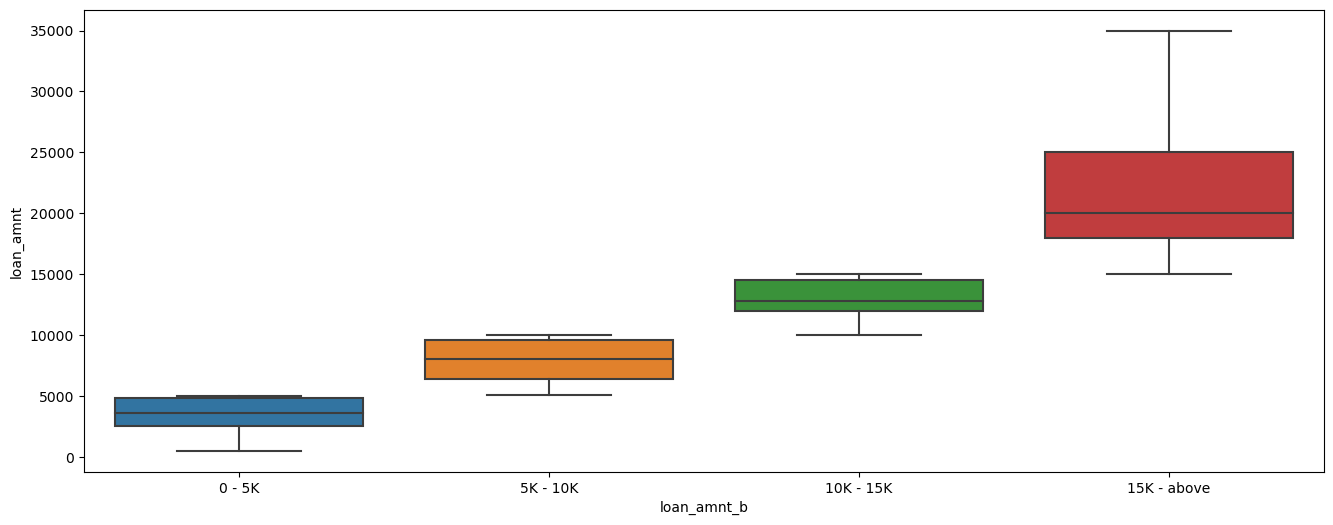

In [45]:
# Define a function to bucket the loan amount
def bucket_loan_amount(column):
    if column <= 5000:
        return '0 - 5K'  # Lower quartile
    elif (column > 5000) and (column <= 10000):
        return '5K - 10K'      
    elif (column > 10000) and (column <= 15000):
        return '10K - 15K'  
    else:
        return '15K - above'  # Upper quartile

# Apply the bucketing function to create a new column 'loan_amnt_b'
loan_data['loan_amnt_b'] = loan_data['loan_amnt'].apply(bucket_loan_amount)

# Validate the categories using a box plot
plt.figure(figsize=(16, 6))
sns.boxplot(y=loan_data.loan_amnt, x=loan_data.loan_amnt_b)
plt.show()

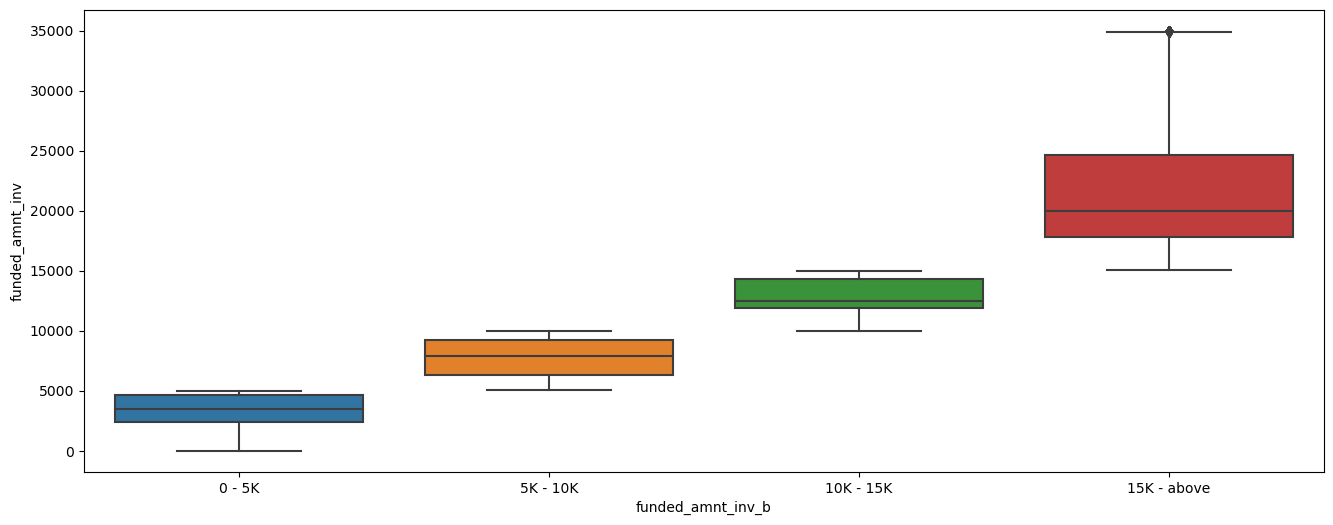

In [46]:
# Display descriptive statistics for the 'funded_amnt_inv' column
# The total amount committed by investors for that loan at that point in time.

loan_data['funded_amnt_inv'].describe()

# Bucketting Funded Amount
def bucket_funded_amnt_inv(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column > 5000) and (column <= 10000):
        return '5K - 10K'      
    elif (column > 10000) and (column <= 15000):
        return '10K - 15K'  
    else:
        return '15K - above' # 75% quartile
    
# Applying bucket_funded_amnt_inv function to create a new column 'funded_amnt_inv_b'
loan_data['funded_amnt_inv_b'] = loan_data['funded_amnt_inv'].apply(bucket_funded_amnt_inv)

# Validating Categories with a box plot
plt.figure(figsize=(16, 6))
sns.boxplot(y=loan_data.funded_amnt_inv, x=loan_data.funded_amnt_inv_b)
plt.show()

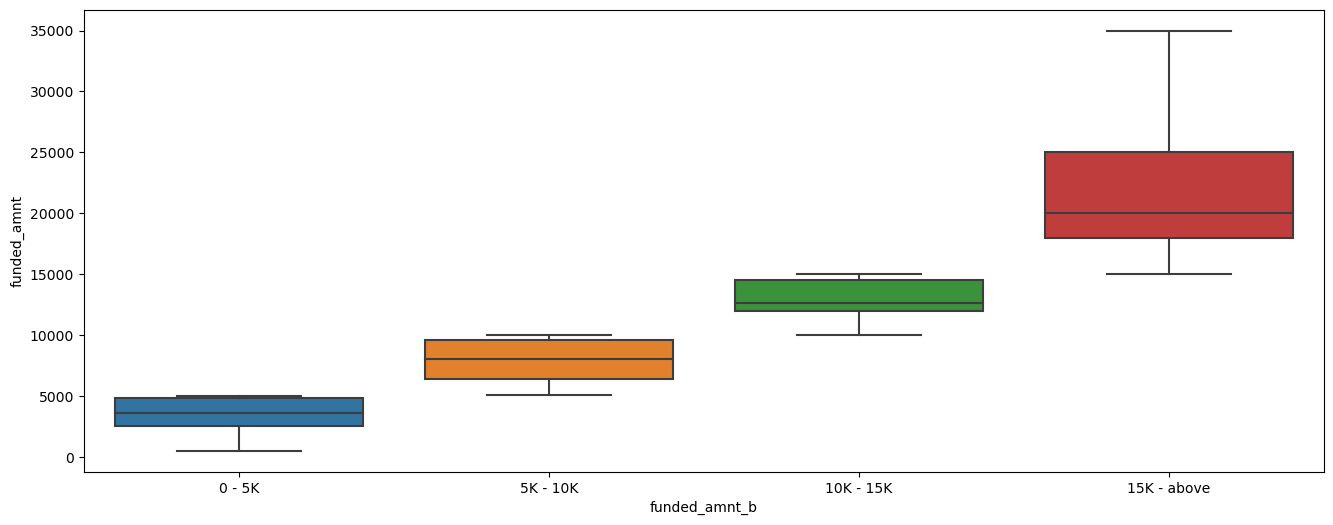

In [47]:
# Display descriptive statistics for the 'funded_amnt' column
# The total amount committed to that loan at that point in time.

loan_data['funded_amnt'].describe()

# Define a function to bucket the 'funded_amnt' values
def bucket_funded_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # Bucket for values up to 5,000
    elif (column > 5000) and (column <= 10000):
        return '5K - 10K'  # Bucket for values between 5,001 and 10,000      
    elif (column > 10000) and (column <= 15000):
        return '10K - 15K'  # Bucket for values between 10,001 and 15,000  
    else:
        return '15K - above'  # Bucket for values above 15,000

# Apply the bucket_funded_amnt function to create a new column 'funded_amnt_b'
loan_data['funded_amnt_b'] = loan_data['funded_amnt'].apply(bucket_funded_amnt)

# Validate the created categories using a box plot
plt.figure(figsize=(16, 6))
sns.boxplot(y=loan_data.funded_amnt, x=loan_data.funded_amnt_b)
plt.show()

In [48]:
# Display descriptive statistics for the 'annual_inc' column in thousands
loan_data['annual_inc'].describe() / 1000

count      36.847000
mean       69.404482
std        64.027473
min         4.000000
25%        41.004000
50%        60.000000
75%        83.000000
max      6000.000000
Name: annual_inc, dtype: float64

In [49]:
# Define a function to bucket the 'annual_inc' values
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k'  # Bucket for values up to 40,000
    elif (column > 40000) and (column <= 50000):
        return '40k - 50k'  # Bucket for values between 40,001 and 50,000    
    elif (column > 50000) and (column <= 60000):
        return '50k to 60k'  # Bucket for values between 50,001 and 60,000
    elif (column > 60000) and (column <= 70000):
        return '60k to 70k'  # Bucket for values between 60,001 and 70,000
    elif (column > 70000) and (column <= 80000):
        return '70k to 80k'  # Bucket for values between 70,001 and 80,000
    else:
        return '80k - above'  # Bucket for values above 80,000

# Apply the bucket_annual_inc function to create a new column 'annual_inc_b'
loan_data['annual_inc_b'] = loan_data.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis=1)

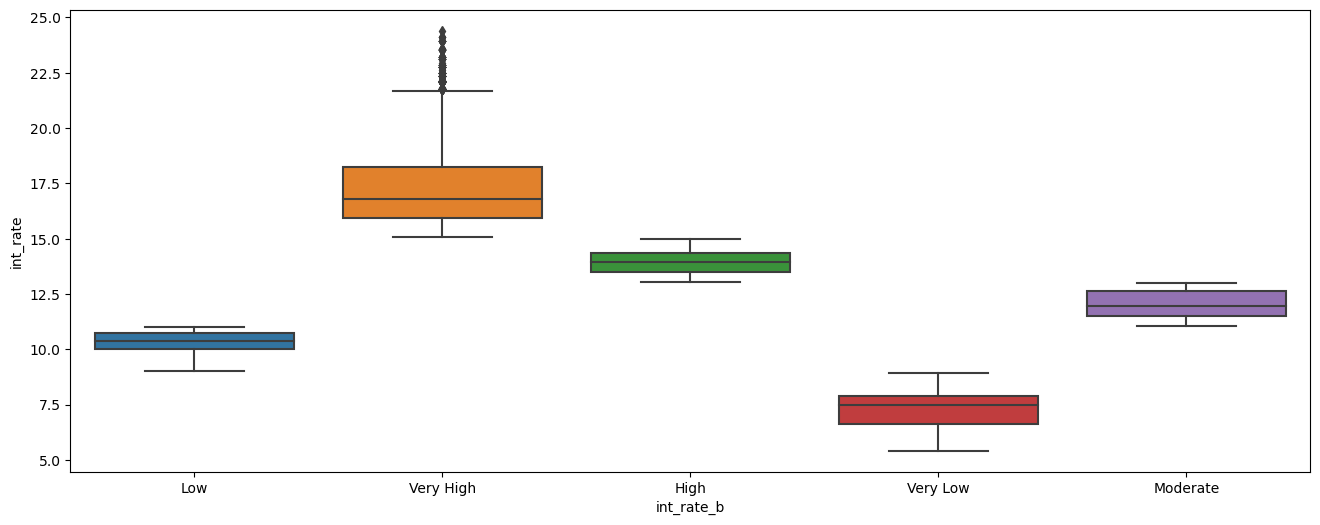

In [50]:
# Display descriptive statistics for the 'int_rate' column
loan_data['int_rate'].describe()

# Define a function to bucket the 'int_rate' values
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low'  # Bucket for interest rates up to 9%
    elif (column > 9) and (column <= 11):
        return 'Low'  # Bucket for interest rates between 9% and 11%    
    elif (column > 11) and (column <= 13):
        return 'Moderate'  # Bucket for interest rates between 11% and 13%
    elif (column > 13) and (column <= 15):
        return 'High'  # Bucket for interest rates between 13% and 15%
    else:
        return 'Very High'  # Bucket for interest rates above 15%

# Apply the bucket_int_rate function to create a new column 'int_rate_b'
loan_data['int_rate_b'] = loan_data.apply(lambda x: bucket_int_rate(x.int_rate), axis=1)

# Validate the created categories using a box plot
plt.figure(figsize=(16, 6))
sns.boxplot(y=loan_data.int_rate, x=loan_data.int_rate_b)
plt.show()

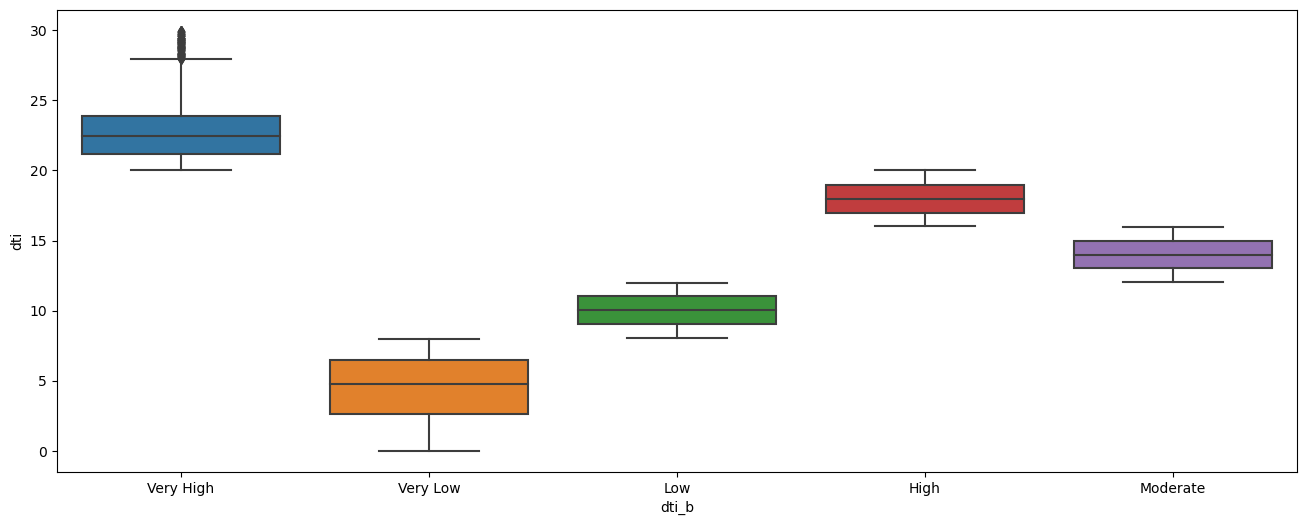

In [51]:
# Display descriptive statistics for the 'dti' column
loan_data['dti'].describe()

# Define a function to bucket the 'dti' values
def bucket_dti(column):
    if column <= 8:
        return 'Very Low'  # Bucket for debt-to-income ratios up to 8%
    elif (column > 8) and (column <= 12):
        return 'Low'  # Bucket for debt-to-income ratios between 8% and 12%    
    elif (column > 12) and (column <= 16):
        return 'Moderate'  # Bucket for debt-to-income ratios between 12% and 16%
    elif (column > 16) and (column <= 20):
        return 'High'  # Bucket for debt-to-income ratios between 16% and 20%
    else:
        return 'Very High'  # Bucket for debt-to-income ratios above 20%

# Apply the bucket_dti function to create a new column 'dti_b'
loan_data['dti_b'] = loan_data.apply(lambda x: bucket_dti(x.dti), axis=1)

# Validate the created categories using a box plot
plt.figure(figsize=(16, 6))
sns.boxplot(y=loan_data.dti, x=loan_data.dti_b)
plt.show()

## 9. Univariate Analysis

In [52]:
# Dictionary containing column titles and their corresponding descriptions
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount by Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Ownership Status',
    'annual_inc': 'Annual Income', 
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt-To-Income Ratio',
    'pub_rec_bankruptcies': 'Public Record Bankruptcies',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}


### 9.1 COMMON FUNCTIONS

In [53]:
# Function to calculate the Interquartile Range (IQR) and identify outliers for a specific column

def get_iqr(df, column):
    quartile_25 = df[column].quantile(0.25)
    quartile_75 = df[column].quantile(0.75)
    iqr = quartile_75 - quartile_25
    lower_bound = quartile_25 - 1.5 * iqr
    upper_bound = quartile_75 + 1.5 * iqr
    return {'quartile1': quartile_25, 'quartile3': quartile_75, 'iqr': iqr, 'lower_bound': lower_bound, 'upper_bound': upper_bound}

# Function to visualize and compare outliers before and after treatment for a specific column
def outlier_comparison(df, column):
    fig, axes = plt.subplots(1, 2, figsize=(14, 3))
    boxplot1 = sns.boxplot(df[column], ax=axes[0], orient="h")
    boxplot1.set_title('Plot [' + column + '] - Original')
    new_df = df[df[column] < get_iqr(df, column)['upper_bound']]
    boxplot2 = sns.boxplot(new_df[column], ax=axes[1])
    boxplot2.set_title('Plot [' + column + '] - Post Outlier Treatment')
    plt.tight_layout()
    plt.show()

# Function to drop outliers from a specific column and return the updated DataFrame
def drop_outlier(df, column):
    old_rows = len(df)
    new_df = df[df[column] < get_iqr(df, column)['upper_bound']]
    new_rows = len(new_df)
    dropped_rows = old_rows - new_rows
    percentage_dropped = round((dropped_rows / old_rows) * 100, 2)
    print('Rows dropped:', dropped_rows)
    print('Percentage rows dropped:', percentage_dropped, "%")
    return new_df

In [54]:
def univariate_analysis(df, column):
    # Creating subplots for distribution plot and box plot
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    
    # Distribution plot
    sns.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=axes[0])
    axes[0].set_xlabel(column_titles[column])  # Setting x-label for distribution plot
    
    # Box plot
    sns.boxplot(x=column, data=df, ax=axes[1])
    axes[1].set_xlabel(column_titles[column])  # Setting x-label for box plot
    
    # Adjusting layout and displaying plots
    plt.tight_layout()
    plt.show()

In [55]:
# Function for bivariate analysis of a categorical column against loan_status
def analysis_vs_loan_status(df, col):
    # Creating subplots for countplot and stacked bar plot
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    
    # Countplot
    countplot = sns.countplot(df[col], ax=axes[0])
    countplot.set_xticklabels(countplot.get_xticklabels(), rotation=90)
    axes[0].set_title('[' + col + '] - loan_status=all')
    
    # Stacked bar plot
    cross_tab = pd.crosstab(df[col], df['loan_status'], normalize='index')
    cross_tab.plot.bar(ax=axes[1], stacked=True)
    axes[1].set_title('[' + col + '] - Stacked')
    
    # Displaying the plots
    plt.show()

# Function for bivariate analysis of a continuous column against loan_status
def continious_column_analysis(df, column):
    # Creating subplots for distribution plot and box plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
    
    # Distribution plot
    sns.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=ax1)
    ax1.set_xlabel(column_titles[column])
    
    # Box plot
    sns.boxplot(x=column, y='loan_status', data=df, ax=ax2)
    ax2.set_xlabel(column_titles[column] + ' by Loan Status')
    
    # Adjusting layout and displaying plots
    plt.tight_layout()
    plt.show()
    
    # Return group by dataframe for display comparison
    return df.groupby('loan_status')[column].describe()

# Function for comparison of loan_status across a categorical column
def comparison_loan_status(df, column):
    df.groupby('loan_status')[column].value_counts().unstack().plot(kind='bar', figsize=[16,4])
    plt.show()

# Function to calculate and plot charge-off ratio for a categorical column
def ratio_wise(df, column):
    rw = df.pivot_table(index=column, columns='loan_status', values='id', aggfunc=len).reset_index()
    rw['total'] = rw['Charged Off'] + rw['Fully Paid']
    rw['charge_off_ratio'] = round(rw['Charged Off'] / rw['total'] * 100)
    rw.sort_values(by='total', ascending=False)
    return rw

def ratio_wise_plot(df, column, invert=False):
    plt.figure(figsize=[20,8])
    plt.title('Charged Off : ' + column_titles[column])
    rw = ratio_wise(df, column)
    if invert:
        sea.barplot(rw['charge_off_ratio'], rw[column])
    else:
        sea.barplot(rw[column], rw['charge_off_ratio'])
    plt.tight_layout()
    plt.show()
    return rw

# Function for plotting series data
def series_plot(df, column, hue=None, annot=1):
    fig, ax = plt.subplots(figsize=(20,14))
    width = len(df[column].unique()) + 6 + 4 * len(df.unique())
    fig.set_size_inches(width , 7)
    ax = sns.countplot(data=df, x=column, order=df[column].value_counts().index, hue=hue) 
    if annot == 1:
        for p in ax.patches:
            ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))  
    elif annot == 2:
        for p in ax.patches:
            ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
    plt.show()

### 9.2. Handling Outliers
Addressing outliers in the primary variables and removing them to ensure cleaner data analysis.

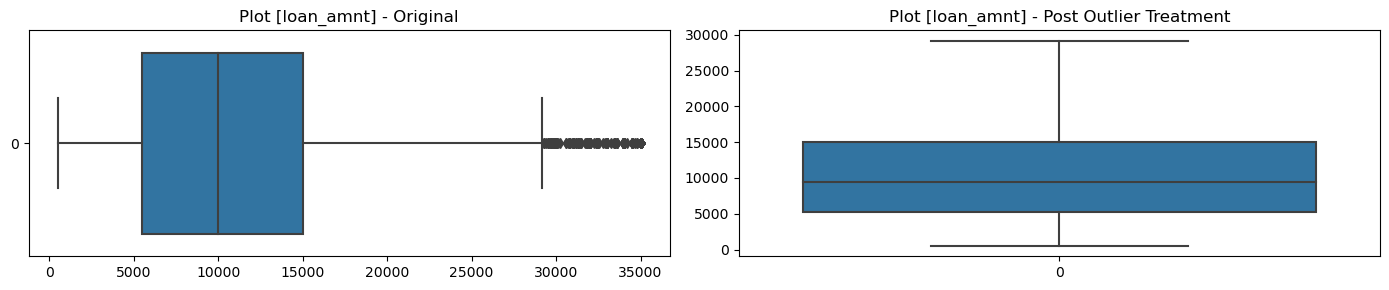

Rows dropped: 1078
Percentage rows dropped: 2.93 %


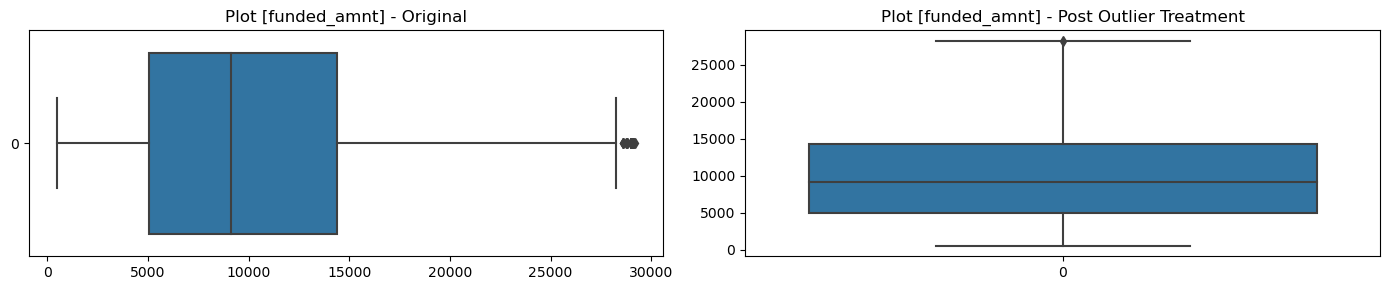

Rows dropped: 30
Percentage rows dropped: 0.08 %


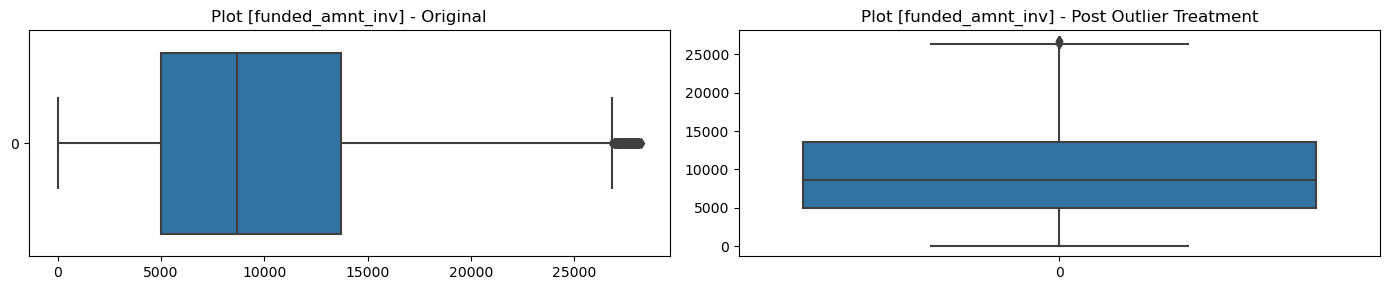

Rows dropped: 153
Percentage rows dropped: 0.43 %


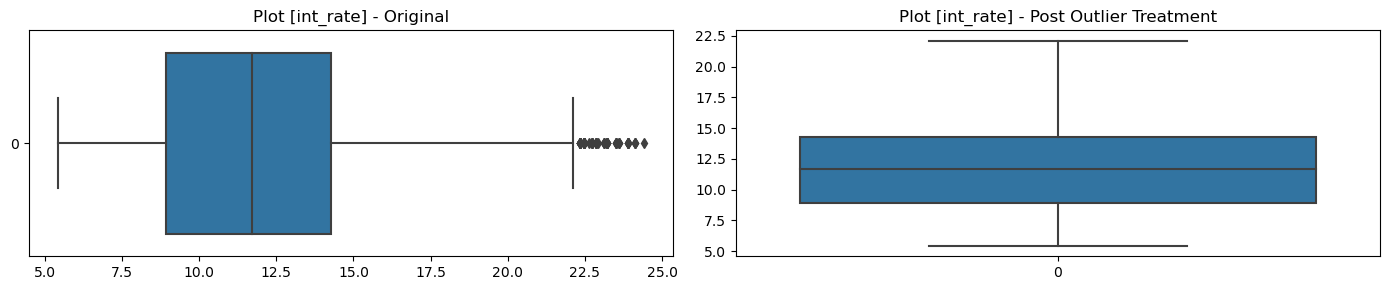

Rows dropped: 63
Percentage rows dropped: 0.18 %


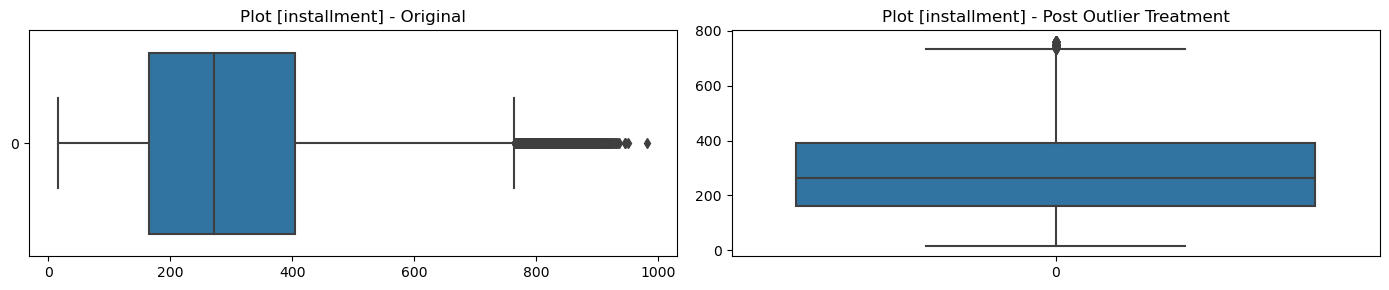

Rows dropped: 981
Percentage rows dropped: 2.76 %


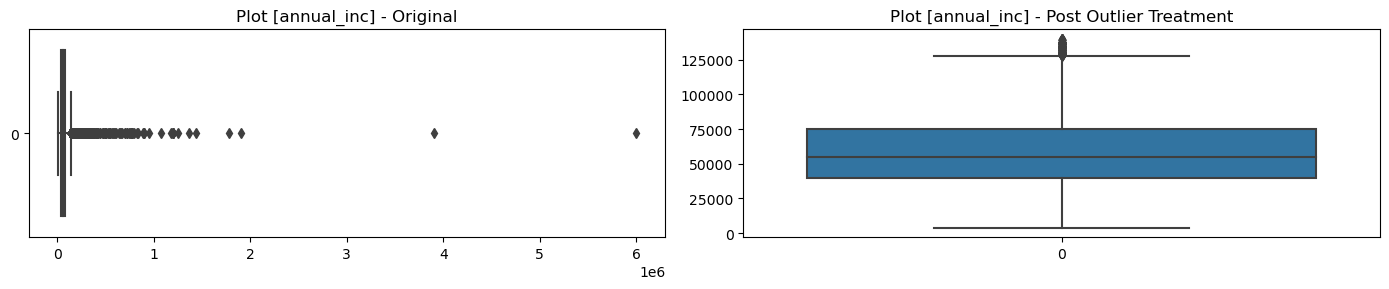

Rows dropped: 1486
Percentage rows dropped: 4.3 %


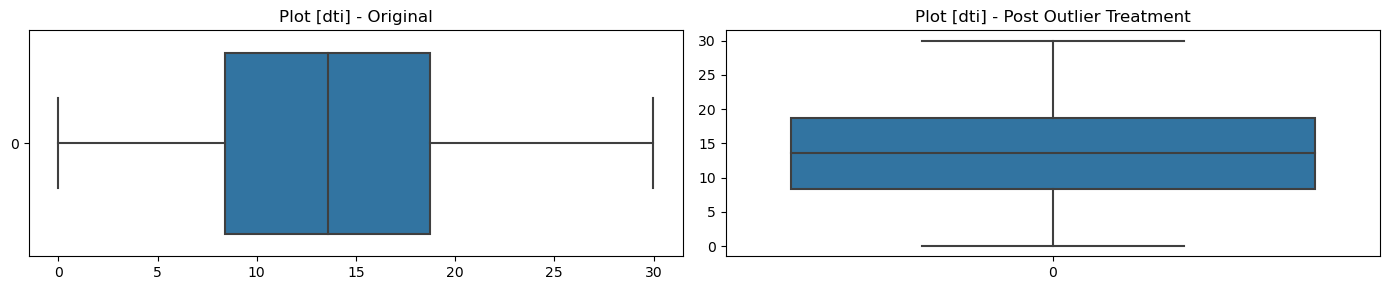

Rows dropped: 0
Percentage rows dropped: 0.0 %


In [56]:
# Store the original number of rows in the loan dataset
original_row_count = len(loan_data)

# List of columns for outlier treatment
outlier_treatment = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti']

# Iterate over each column for outlier treatment
for column in outlier_treatment:
    # Visualize and compare box plots before and after outlier treatment
    outlier_comparison(loan_data, column)
    
    # Drop outliers from the loan dataset and update it
    loan_data = drop_outlier(loan_data, column)

In [57]:
# Get the new number of rows in the loan_data dataset after dropping outliers
new_row_count = len(loan_data)

# Calculate and print the number and percentage of rows dropped
rows_removed = original_row_count - new_row_count
percentage_removed = round((rows_removed / original_row_count) * 100, 2)

print('Rows removed:', rows_removed)
print('Percentage rows removed:', percentage_removed, '%')

Rows removed: 3791
Percentage rows removed: 10.29 %


## 10. Quantitative Variable Analysis
### loan_amnt

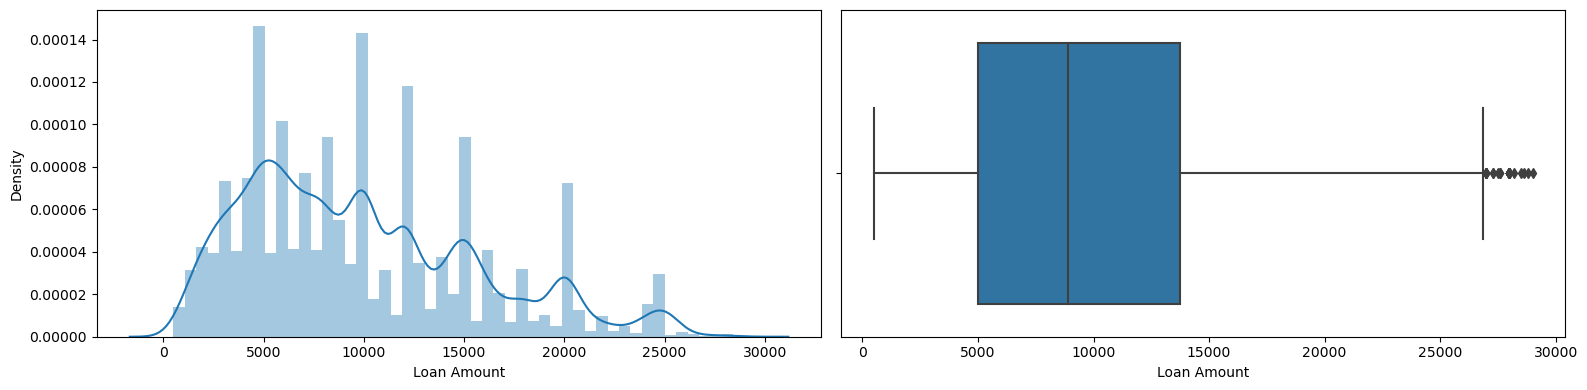

In [58]:
univariate_analysis(loan_data, 'loan_amnt')

##### Majority of the loan_amount is in the range of 5K to 14K

___

### funded_amnt

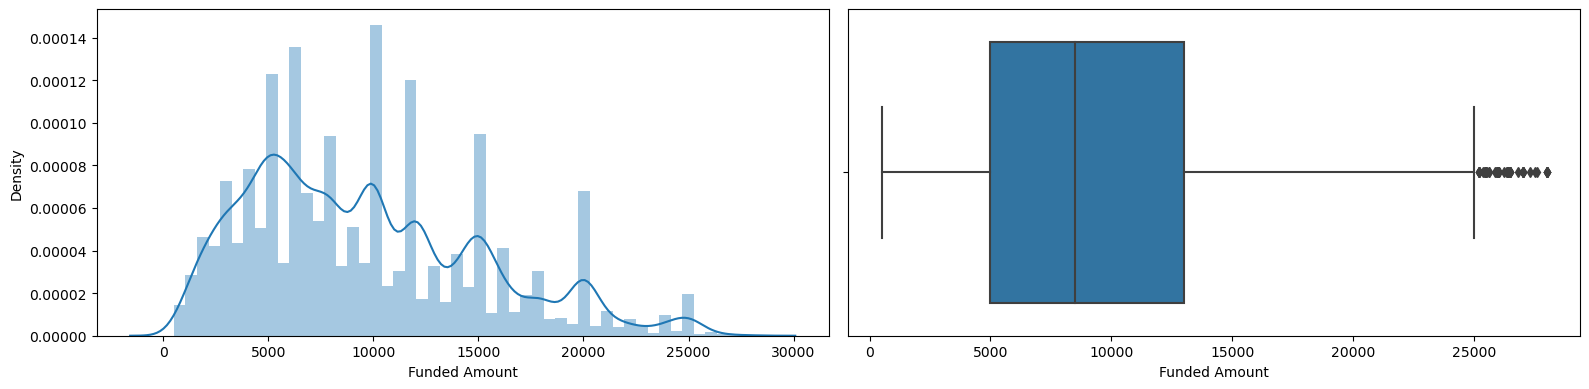

In [59]:
univariate_analysis(loan_data, 'funded_amnt')

###### Majority of the funded_amnt is in the range of 5K to 13K

___

### funded_amnt_inv

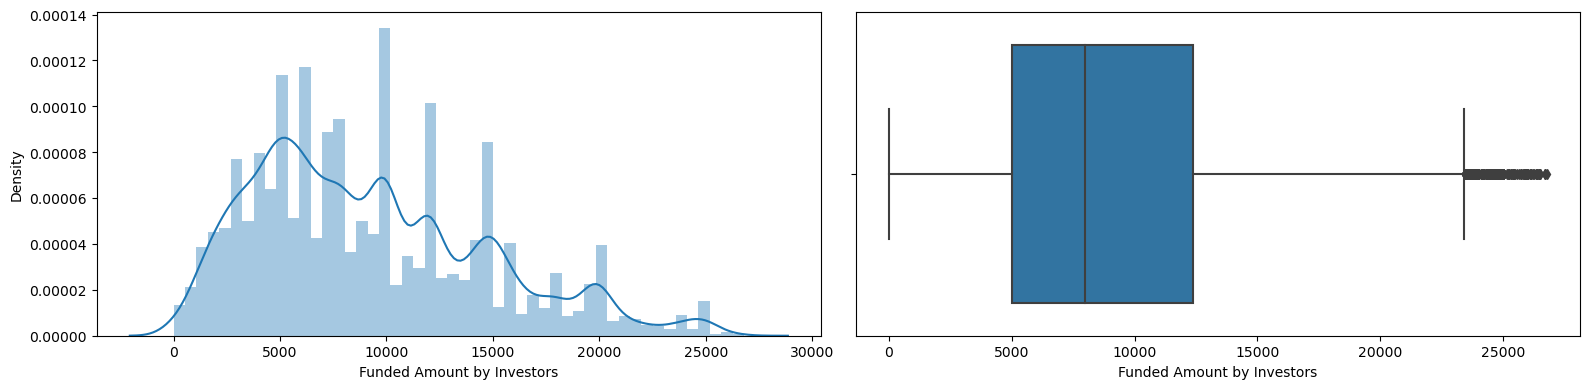

In [60]:
univariate_analysis(loan_data, 'funded_amnt_inv')

##### Majority of the funded_amnt_inv is in the range of 5K to 12K

___

### int_rate

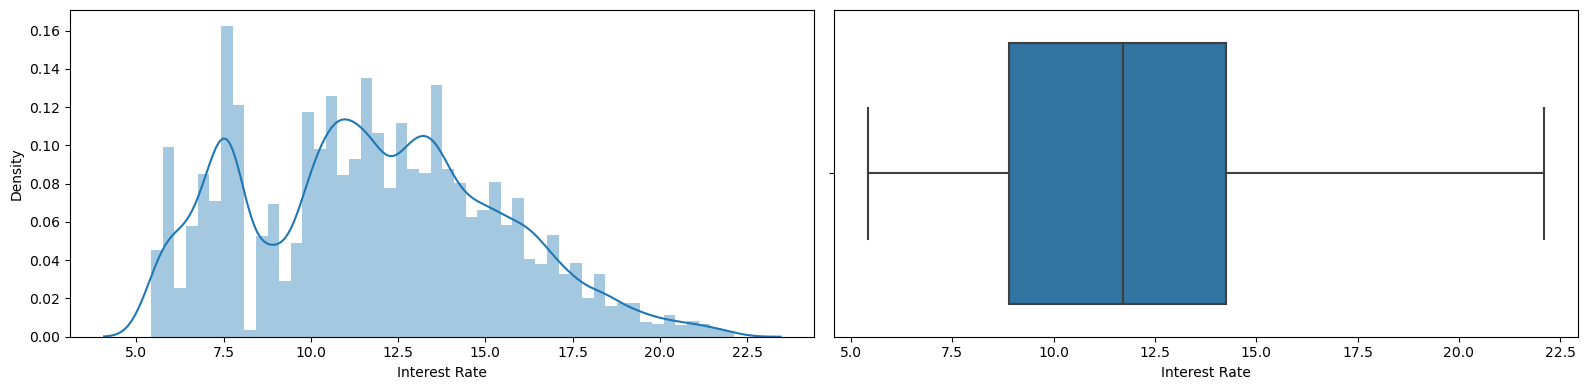

In [61]:
univariate_analysis(loan_data, 'int_rate')

##### Majority of the interest rate is in the range of 5% to 16% going at the max to 22%

___

### installment

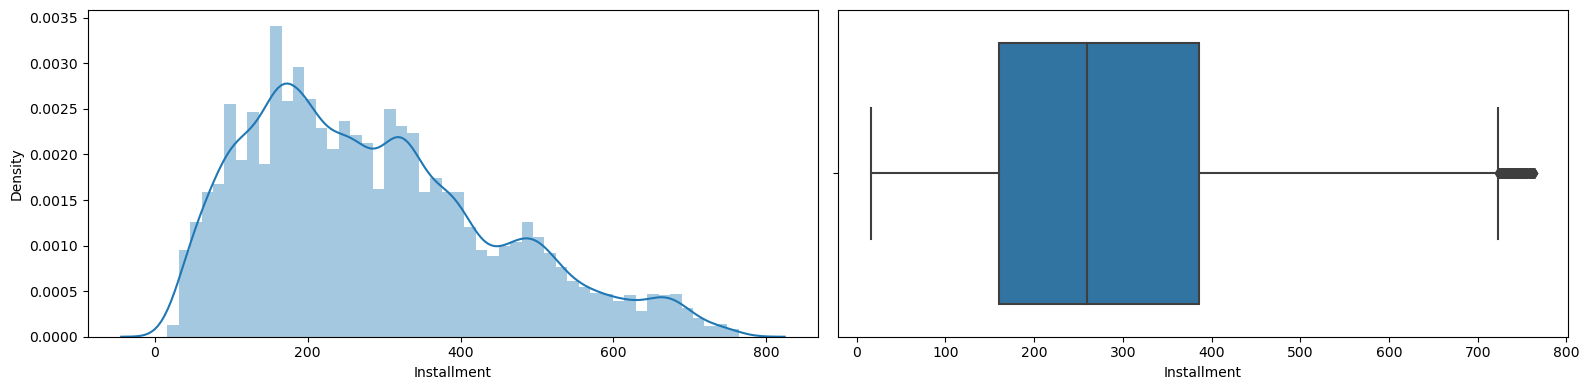

In [62]:
univariate_analysis(loan_data, 'installment')

##### Majority of the installment is in the range of 20 to 400 going at the max to 700

___

### annual_inc

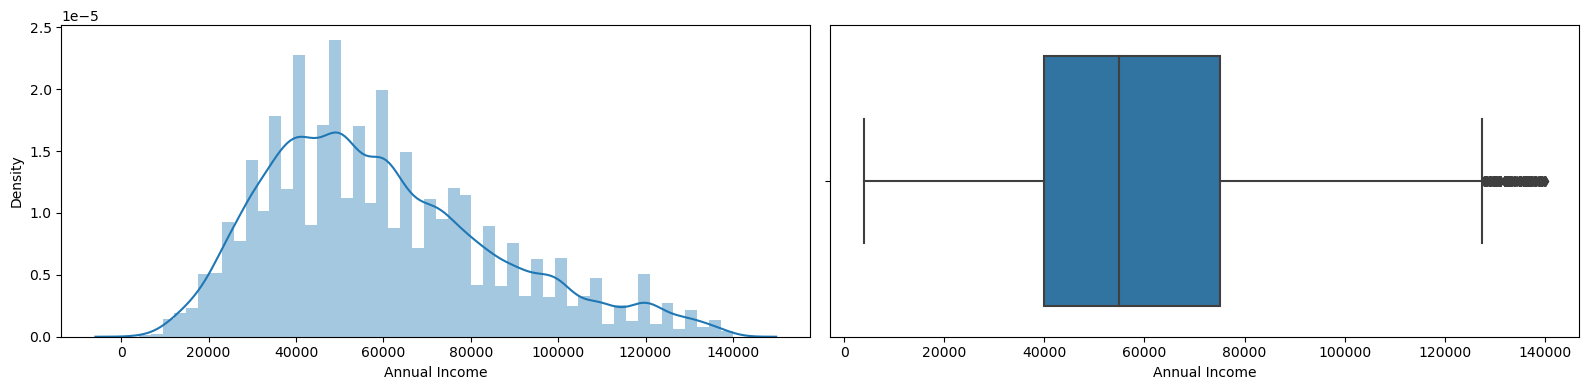

In [63]:
univariate_analysis(loan_data, 'annual_inc')

##### Majority of the annual income is in the range of 4k to 40k going at the max to 120k. This column required major outlier treatment.

___

### dti

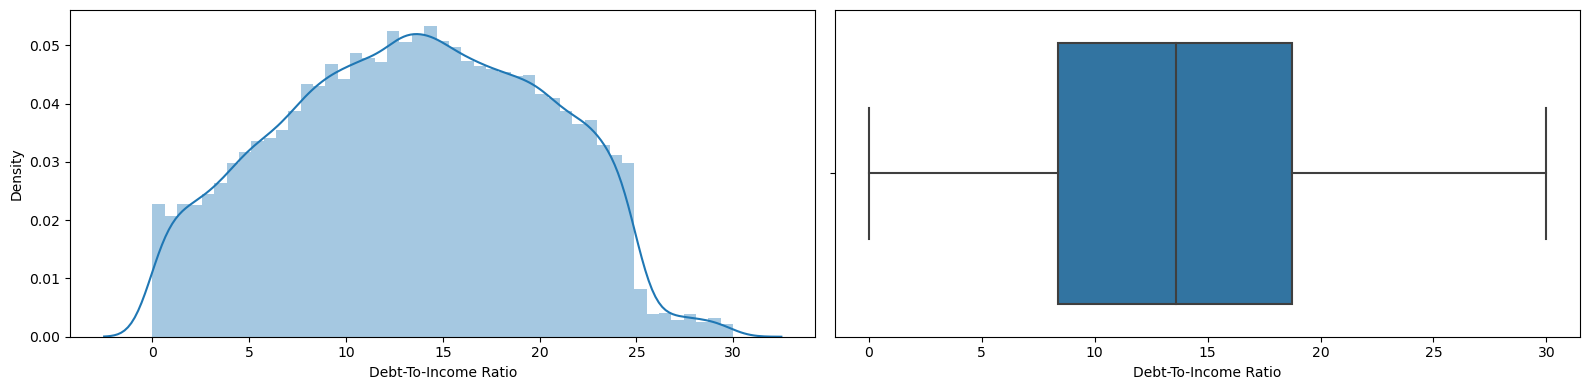

In [64]:
univariate_analysis(loan_data, 'dti')

## 11. Unordered Categorical Variable Analysis
### home_ownership

<Axes: xlabel='home_ownership'>

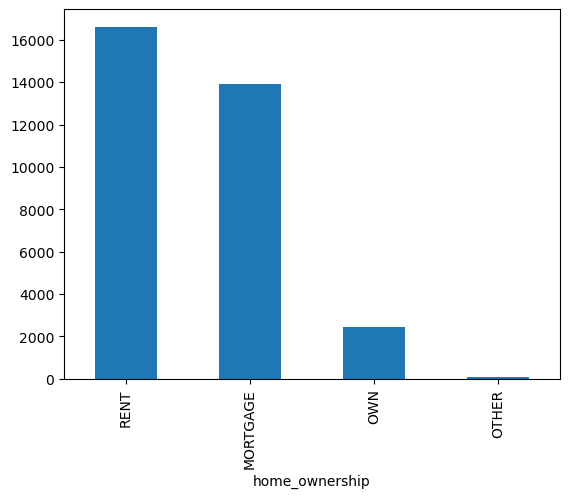

In [65]:
loan_data['home_ownership'].value_counts().plot.bar()

##### Majority of the home owner status are in status of RENT and MORTGAGE

___

### purpose

<Axes: xlabel='purpose'>

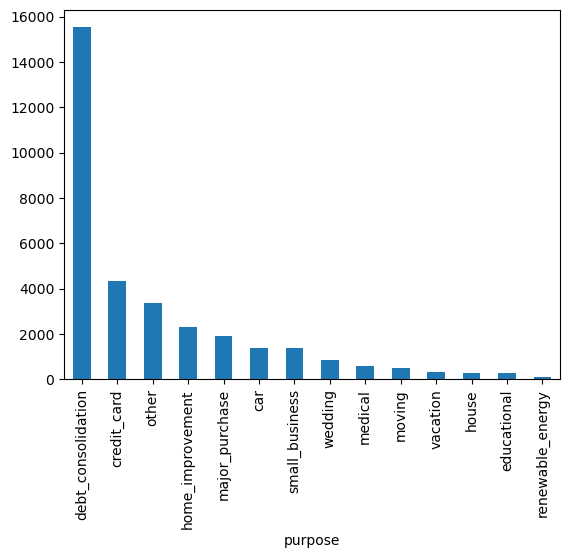

In [66]:
loan_data['purpose'].value_counts().plot.bar()

##### Majority of loan application are in the category of debt_consolidation
___
### addr_state

<Axes: xlabel='addr_state'>

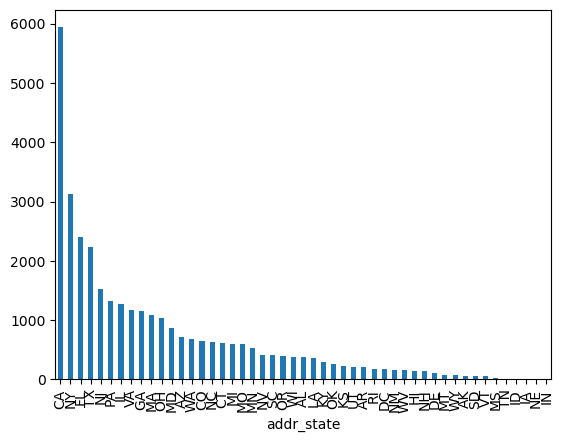

In [67]:
loan_data['addr_state'].value_counts().plot.bar()

##### CA state has the maximum amount of loan applications
___

## 12. Ordered Categorical Variable Analysis

### term

<Axes: xlabel='term'>

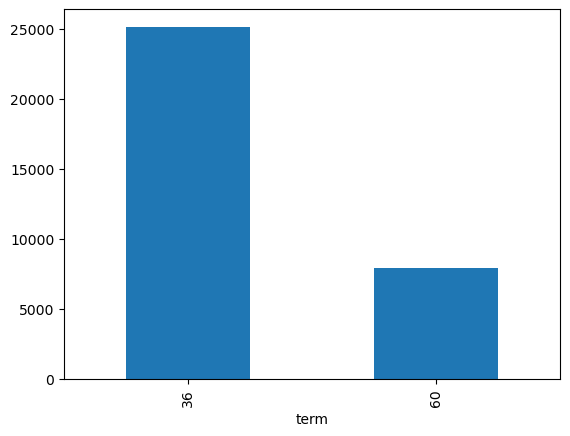

In [68]:
loan_data['term'].value_counts().plot.bar()

##### Majority of the loan applications counts are in the term of 36 months.

___

### grade

<Axes: xlabel='grade'>

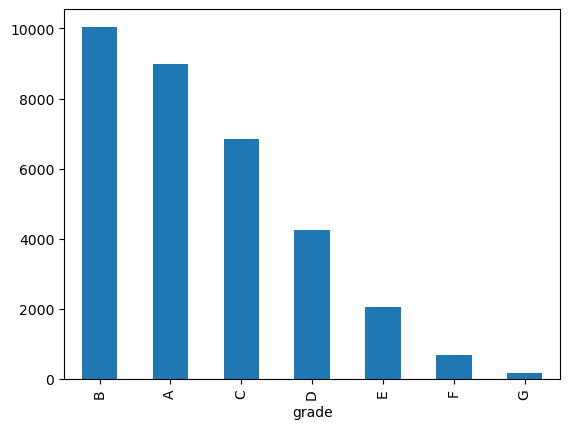

In [69]:
loan_data['grade'].value_counts().plot.bar()

##### Majority of loan application counts fall under the catogory of Grade B and then Grade A

____

### emp_length

<Axes: xlabel='emp_length'>

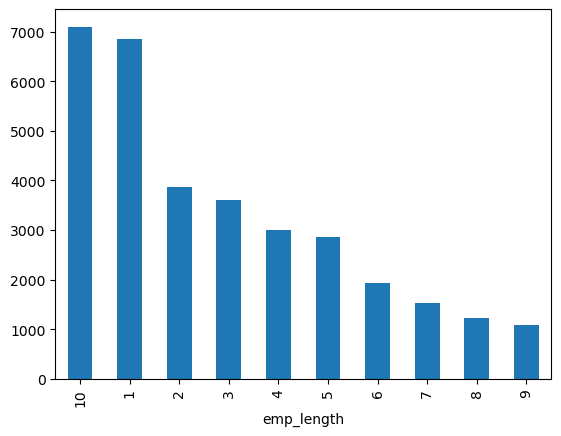

In [70]:
loan_data['emp_length'].value_counts().plot.bar()

##### Majority of the employment length of the customers are 10+ years and then in the range of 0-1 year

____

### pub_rec_bankruptcies

<Axes: xlabel='pub_rec_bankruptcies'>

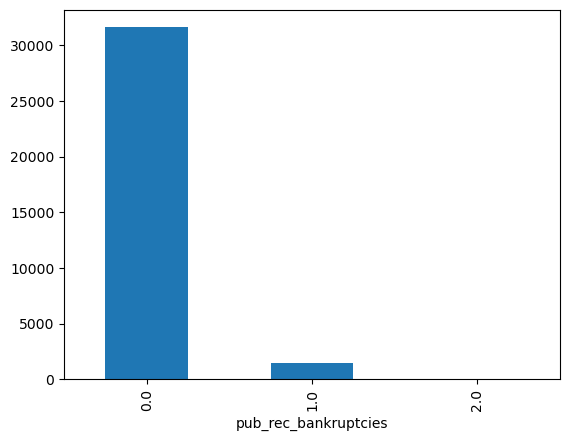

In [71]:
loan_data['pub_rec_bankruptcies'].value_counts().plot.bar()

##### Majority of the loan applicants are in the category of not having an public record of bankruptcies

## 13. Derived Variable Analysis
### issue_year

<Axes: xlabel='issue_year'>

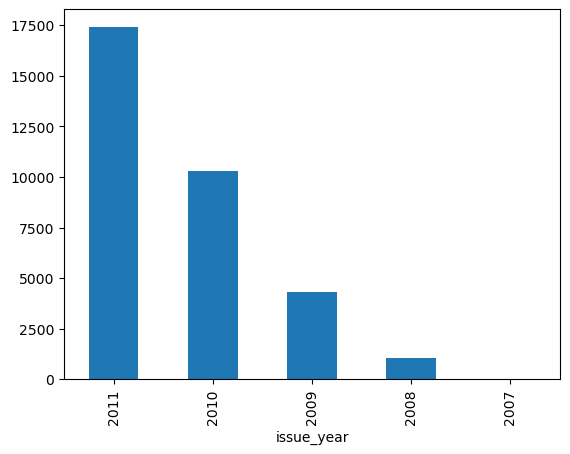

In [72]:
loan_data['issue_year'].value_counts().plot.bar()

##### Loan application counts are increasing year over year. Maybe the risk exposure is increasing over the year (un proven hypothesis)

____

### issue_month

<Axes: xlabel='issue_month'>

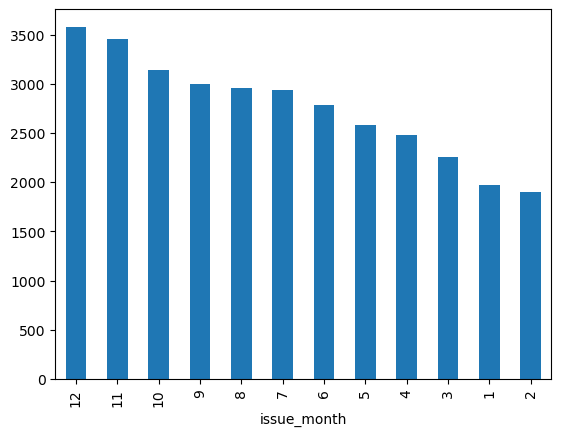

In [73]:
loan_data['issue_month'].value_counts().plot.bar()

The months with the lowest loan application counts appear to be January, February, and March, while the highest counts are observed in October, November, and December.

- This trend might be due to financial challenges typically faced towards the end of the year.
- It could also be influenced by festive seasons when individuals may require additional funds.
- Another possibility is that individuals tend to consolidate debt towards the year's end.
### issue_quarter

<Axes: xlabel='issue_quarter'>

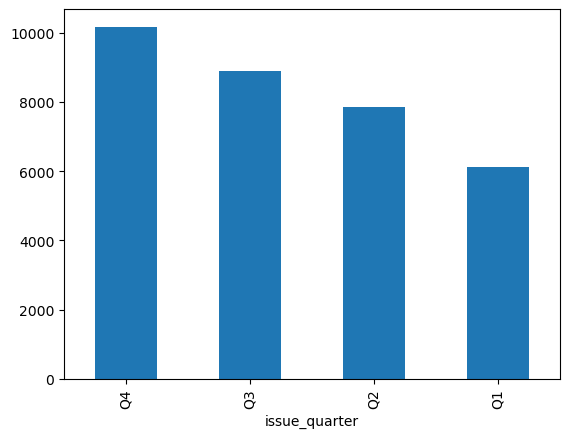

In [74]:
loan_data['issue_quarter'].value_counts().plot.bar()

##### Highest loan application volume in Quarter 4 of a year

___
### loan_amnt_b

<Axes: xlabel='loan_amnt_b'>

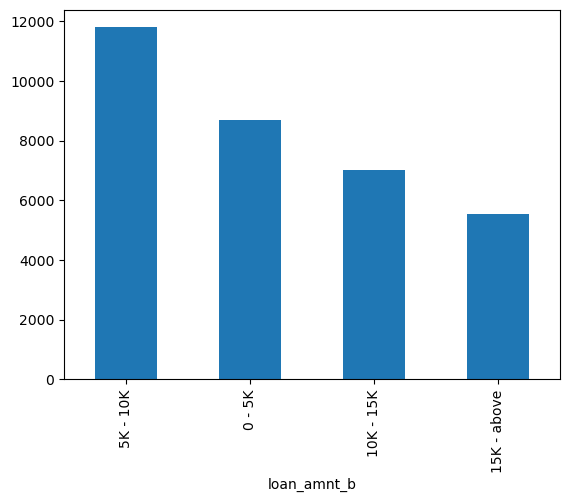

In [75]:
loan_data['loan_amnt_b'].value_counts().plot.bar()

##### Highest loan amount applications fall in the range of 5k to 10k

___

### funded_amnt_b

<Axes: xlabel='funded_amnt_b'>

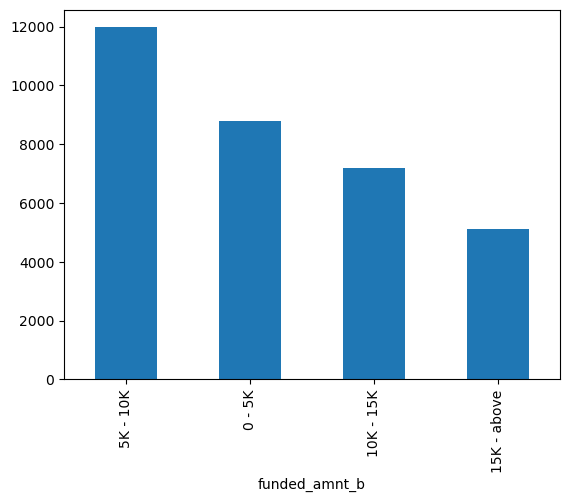

In [76]:
loan_data['funded_amnt_b'].value_counts().plot.bar()

##### Highest funded amount applications fall in the range of 5k to 10k

___

### funded_amnt_inv_b

<Axes: xlabel='funded_amnt_inv_b'>

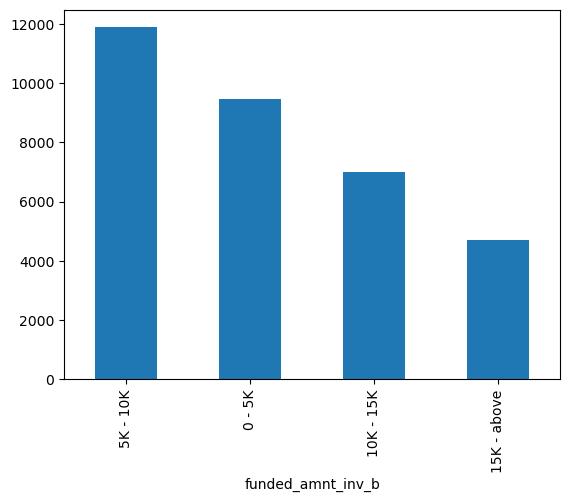

In [77]:
loan_data['funded_amnt_inv_b'].value_counts().plot.bar()

##### Highest loan amount applications fall in the range of 5k to 10k

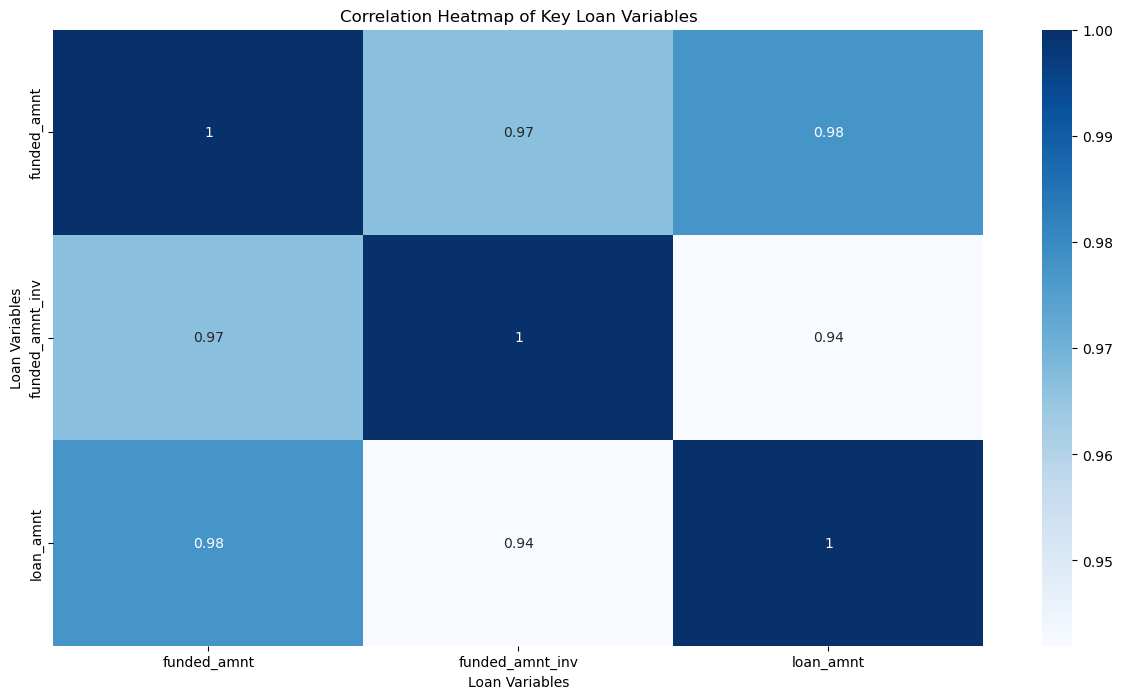

In [78]:
# Analyzing correlations between key loan variables
# Selecting relevant columns for correlation analysis
selected_columns = ['funded_amnt', 'funded_amnt_inv', 'loan_amnt']
corr_matrix = loan_data[selected_columns].corr()

# Plotting heatmap to visualize correlations
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Key Loan Variables')
plt.xlabel('Loan Variables')
plt.ylabel('Loan Variables')
plt.show()

The loan_amt, funded_amt and funded_amt_inv may is highly positively correlated. removing *funded_amnt_inv* and *funded_amnt*

In [79]:
 # Dropping funded_amnt and funded_amnt_inv
loan_data = loan_data.drop(['funded_amnt_inv', 'funded_amnt'],  axis=1)

### annual_inc_b

<Axes: xlabel='annual_inc_b'>

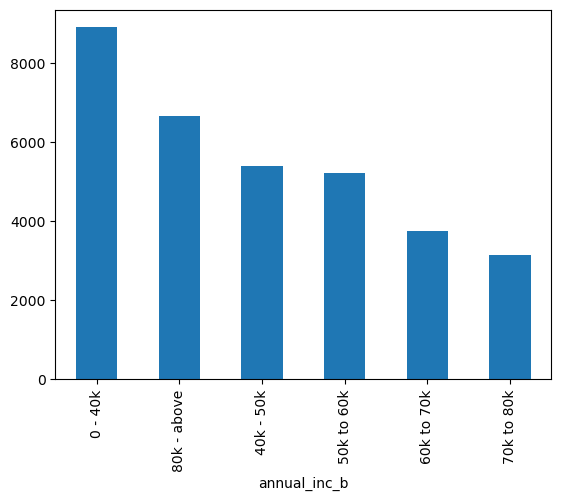

In [80]:
loan_data['annual_inc_b'].value_counts().plot.bar()

##### Majority of the loan applocants are in the range of 0 - 40K anual income

___

### int_rate_b

<Axes: xlabel='int_rate_b'>

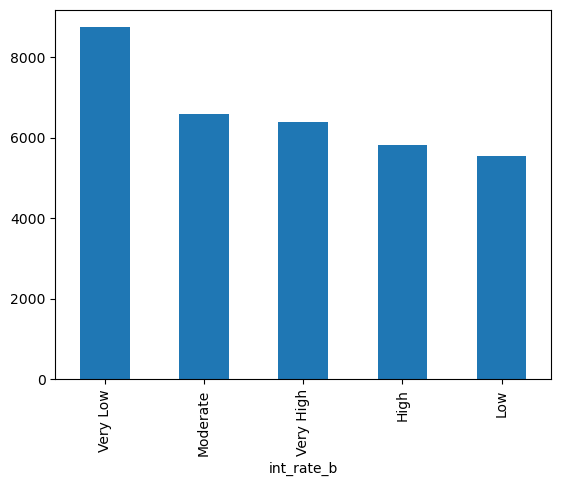

In [81]:
loan_data['int_rate_b'].value_counts().plot.bar()

##### Majority of the loan applocations are in the category of Very Low interest rates

___

### dti_b

<Axes: xlabel='dti_b'>

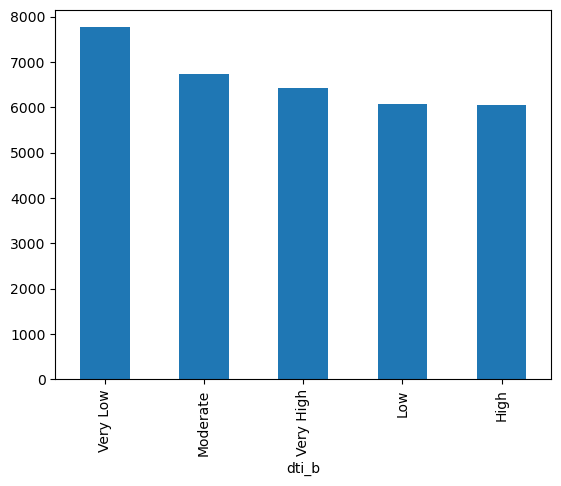

In [82]:
loan_data['dti_b'].value_counts().plot.bar()

##### Majority of the loan applications are in Moderate debt to income ratio

## Overview of Univariate Analysis Results

### Customer Profile
- **Annual Income:** Majority of applicants fall within the 0 - 40K income range.
- **Debt-to-Income Ratio:** Most applicants have a ratio between 0 and 20, with some up to 30.
- **Home Ownership:** Majority of applicants rent or have a mortgage.
- **Loan Purpose:** Debt consolidation is the most common reason for applying for a loan.
- **State Distribution:** California (CA) leads in loan applications.
- **Bankruptcy Record:** Most applicants have no record of bankruptcy.
- **Employment Length:** Majority have 10+ years or 0-2 years of employment.

### Loan Characteristics
- **Loan Amount:** Highest volume falls in the 5k to 10k range.
- **Interest Rate:** Rates vary from 5% to 16%, peaking at 22%.
- **Installment Amount:** Majority cluster around 20.
- **Loan Term:** Most loans have a 36-month term.
- **Loan Grade:** Grade B is the most common.

### Time-Based Trends
- **Annual Trend:** Loan applications increase annually.
- **Peak Period:** Quarter 4 sees the highest volume.
- **Low Period:** Quarter 1 experiences the least activity.
  - **Reasons:** Year-end financial challenges, festive seasons, and debt consolidation.

### Insights and Recommendations
- Targeting the 0 - 40K income segment can yield high loan volumes.
- Further analysis is needed to understand lower application volumes in certain categories.
- Preparation for Quarter 4's high demand is crucial.
- Targeting customers in other quarters can help boost sales and loan volumes.

In [83]:
# Displaying column information to analyze missing values
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 33056 entries, 0 to 39680
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    33056 non-null  int64         
 1   loan_amnt             33056 non-null  float64       
 2   term                  33056 non-null  int64         
 3   int_rate              33056 non-null  float64       
 4   installment           33056 non-null  float64       
 5   grade                 33056 non-null  object        
 6   emp_length            33056 non-null  object        
 7   home_ownership        33056 non-null  object        
 8   annual_inc            33056 non-null  float64       
 9   verification_status   33056 non-null  object        
 10  issue_d               33056 non-null  datetime64[ns]
 11  loan_status           33056 non-null  object        
 12  purpose               33056 non-null  object        
 13  zip_code             

In [84]:
loan_data.head()

,id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec_bankruptcies,issue_year,issue_month,issue_quarter,loan_amnt_b,funded_amnt_inv_b,funded_amnt_b,annual_inc_b,int_rate_b,dti_b
0,1077501,5000.0,36,10.65,162.87,B,10,RENT,24000.0,Verified,...,0.0,2011,12,Q4,0 - 5K,0 - 5K,0 - 5K,0 - 40k,Low,Very High
1,1077430,2500.0,60,15.27,59.83,C,1,RENT,30000.0,Source Verified,...,0.0,2011,12,Q4,0 - 5K,0 - 5K,0 - 5K,0 - 40k,Very High,Very Low
2,1077175,2400.0,36,15.96,84.33,C,10,RENT,12252.0,Not Verified,...,0.0,2011,12,Q4,0 - 5K,0 - 5K,0 - 5K,0 - 40k,Very High,Low
3,1076863,10000.0,36,13.49,339.31,C,10,RENT,49200.0,Source Verified,...,0.0,2011,12,Q4,5K - 10K,5K - 10K,5K - 10K,40k - 50k,High,High
5,1075269,5000.0,36,7.90,156.46,A,3,RENT,36000.0,Source Verified,...,0.0,2011,12,Q4,0 - 5K,0 - 5K,0 - 5K,0 - 40k,Very Low,Low


## 14. Bivariate Analysis
#### Annual Income vs. Charged-off Proportion

In [97]:
# Grouping by annual income bins and loan status
inc_range_vs_loan = loan_data.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

# Calculating total counts and charged-off proportion
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']

# Sorting by charged-off proportion in descending order
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0 - 40k,1570,7326,8896,0.176484
2,50k to 60k,788,4435,5223,0.150871
1,40k - 50k,807,4593,5400,0.149444
3,60k to 70k,486,3261,3747,0.129704
4,70k to 80k,385,2749,3134,0.122846
5,80k - above,664,5992,6656,0.099760


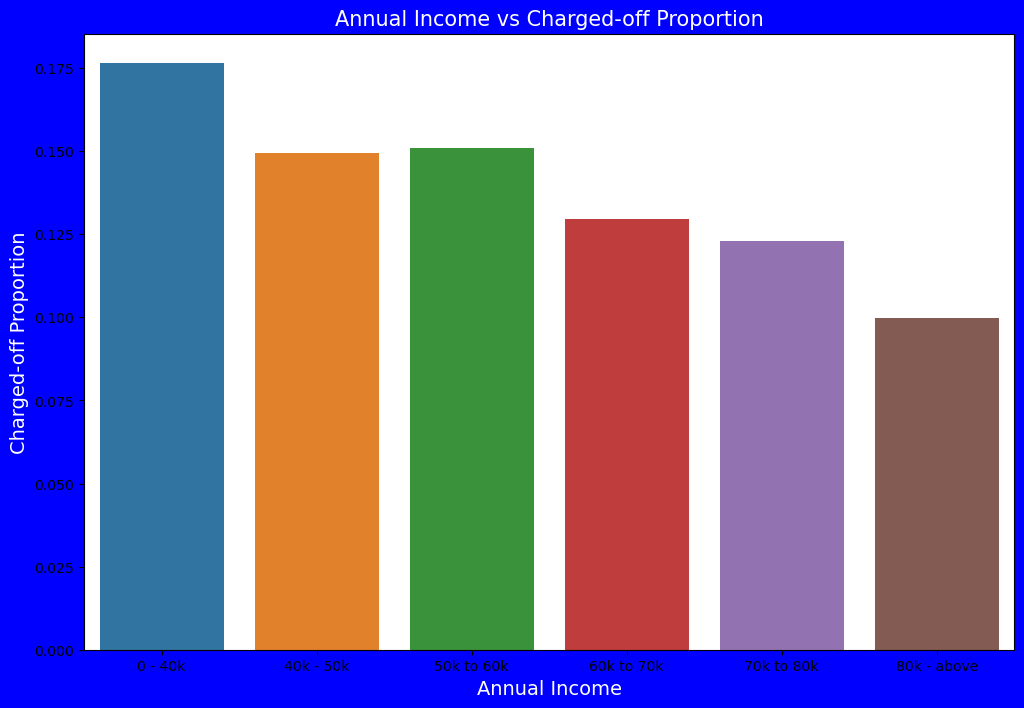

In [86]:
# Visualizing Annual Income vs. Charged-off Proportion

# Creating bar plot
fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='b')
ax1.set_title('Annual Income vs Charged-off Proportion', fontsize=15, color='w')
ax1 = sns.barplot(x='annual_inc_b', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Charged-off Proportion', fontsize=14, color='w')
ax1.set_xlabel('Annual Income', fontsize=14, color='w')
plt.show()

# Observations:
# - The income range of $80,000 and above has a lower proportion of charged-off loans.
# - The income range of $0-$20,000 shows a higher proportion of charged-off loans.
# - There is a noticeable decrease in the proportion of charged-off loans with an increase in annual income.

In [96]:
# Performing Bivariate Analysis on Interest Rate vs. Charged-off Proportion

# Grouping data by interest rate bins and loan status
interest_vs_loan = loan_data.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

# Calculating total count and charged-off proportion
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']

# Sorting by charged-off proportion in descending order
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1665,4721,6386,0.260727
0,High,981,4837,5818,0.168615
2,Moderate,958,5618,6576,0.145681
1,Low,578,4964,5542,0.104294
4,Very Low,518,8216,8734,0.059308


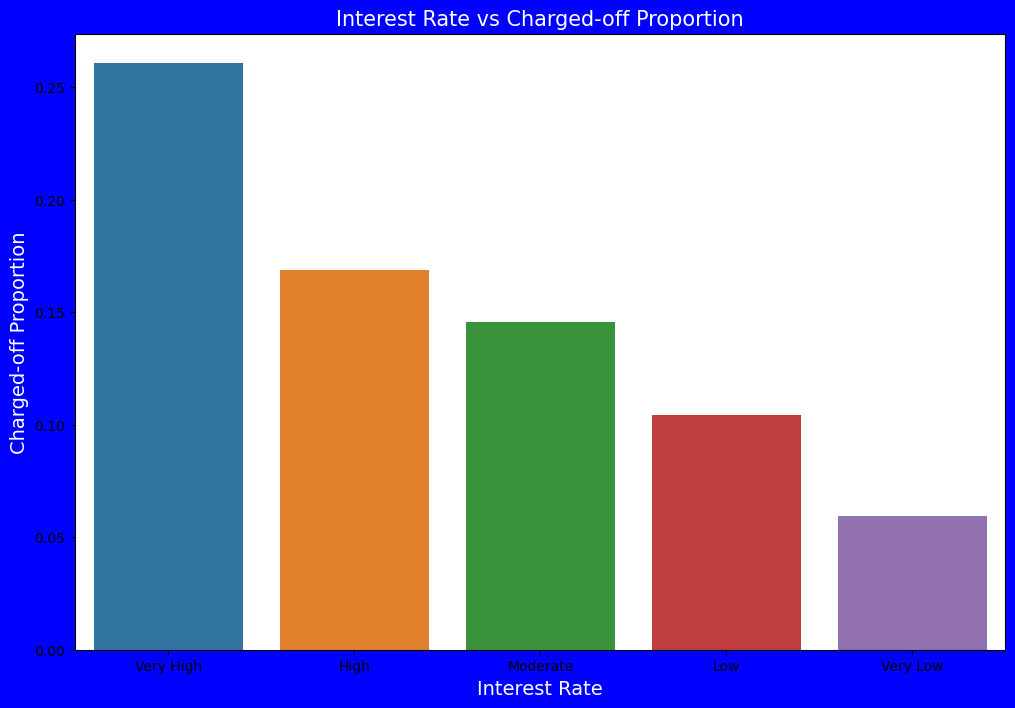

In [91]:
# Plotting the diagram for Interest Rate vs. Charged-off Proportion

fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='b')
ax1.set_title('Interest Rate vs Charged-off Proportion', fontsize=15, color='w')
ax1 = sns.barplot(x='int_rate_b', y='Chargedoff_Proportion', data=interest_vs_loan_sorted)
ax1.set_xlabel('Interest Rate', fontsize=14, color='w')
ax1.set_ylabel('Charged-off Proportion', fontsize=14, color='w')
plt.show()

# Observations:
# Loans with interest rates less than 10% (very low) have a very low chance of being charged off. Interest rates start from a minimum of 5%.
# Loans with interest rates higher than 16% (very high) have a higher chance of being charged off compared to other interest rate categories.
# The proportion of charged-off loans tends to increase with higher interest rates.

#### Another inference form the houseowner variable those who are not owning the house are most likely to be charged off.
___

In [93]:
#Bivariate Analysis of Home Ownership against Chargedoff_Proportion -

home_ownership_vs_loan = loan_data.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,OTHER,16,73,89,0.179775
3,RENT,2484,14125,16609,0.149557
2,OWN,354,2113,2467,0.143494
0,MORTGAGE,1846,12045,13891,0.132892


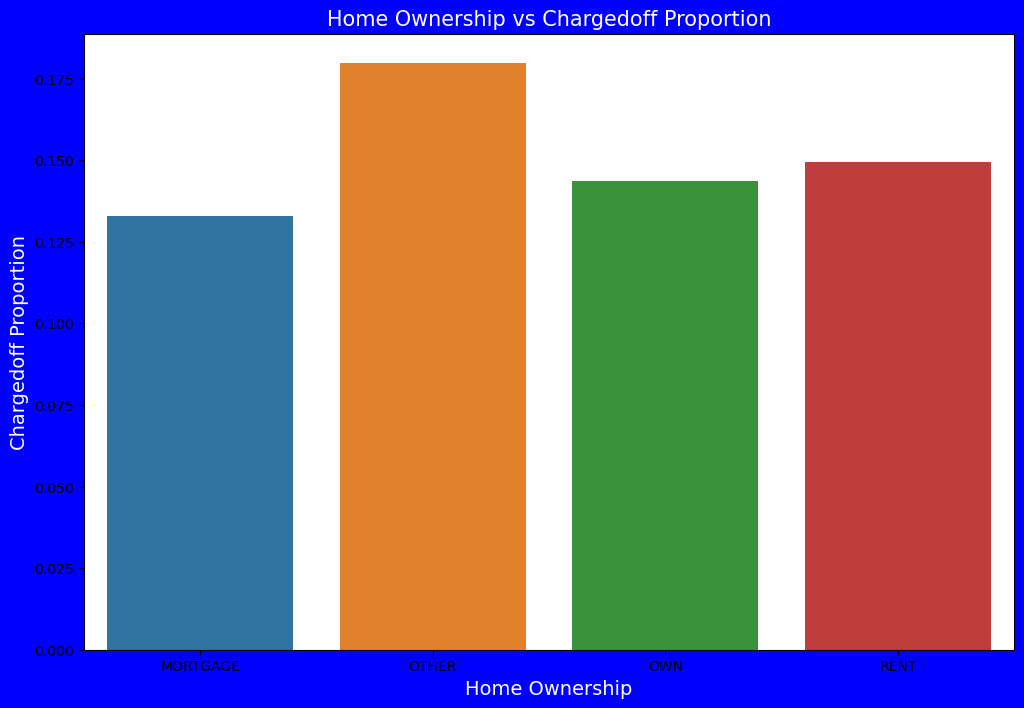

In [94]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Home Ownership vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan)
ax1.set_xlabel('Home Ownership',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

###### Those who are not owning the home is having high chances of loan defaults.
___

In [95]:
#Bivariate Analysis on Purpose of loan against Chargedoff_Proportion -

purpose_vs_loan = loan_data.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,363,1000,1363,0.266324
10,renewable_energy,16,66,82,0.195122
3,educational,46,235,281,0.163701
5,house,48,248,296,0.162162
9,other,531,2818,3349,0.158555
7,medical,95,509,604,0.157285
8,moving,79,428,507,0.155819
2,debt_consolidation,2325,13203,15528,0.149730
12,vacation,49,280,329,0.148936
4,home_improvement,274,2014,2288,0.119755


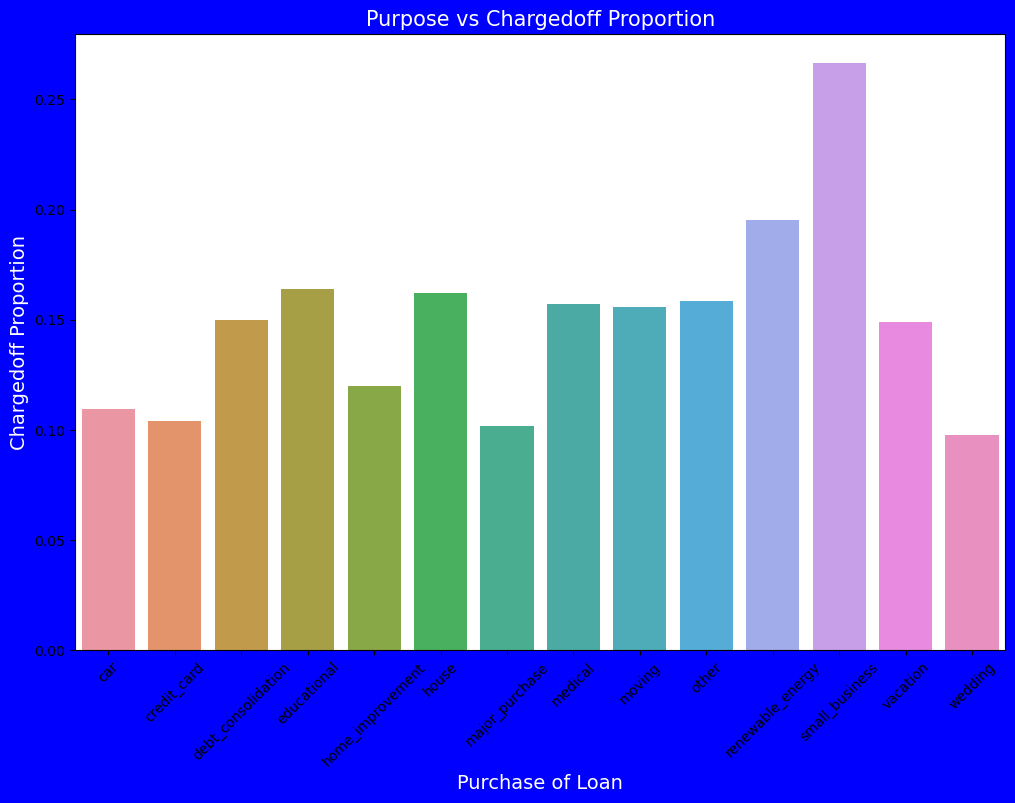

In [98]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Purpose vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_xlabel('Purchase of Loan',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

- Those applicants who is having home loan is having low chances of loan defaults.
- Those applicants having loan for small bussiness is having high chances for loan defaults.

In [99]:
#Bivariate Analysis on DTI against Chargedoff_Proportion -

dti_vs_loan = loan_data.groupby(['dti_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off']+ dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,dti_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1043,5377,6420,0.162461
0,High,946,5096,6042,0.156571
2,Moderate,983,5763,6746,0.145716
1,Low,785,5300,6085,0.129006
4,Very Low,943,6820,7763,0.121474


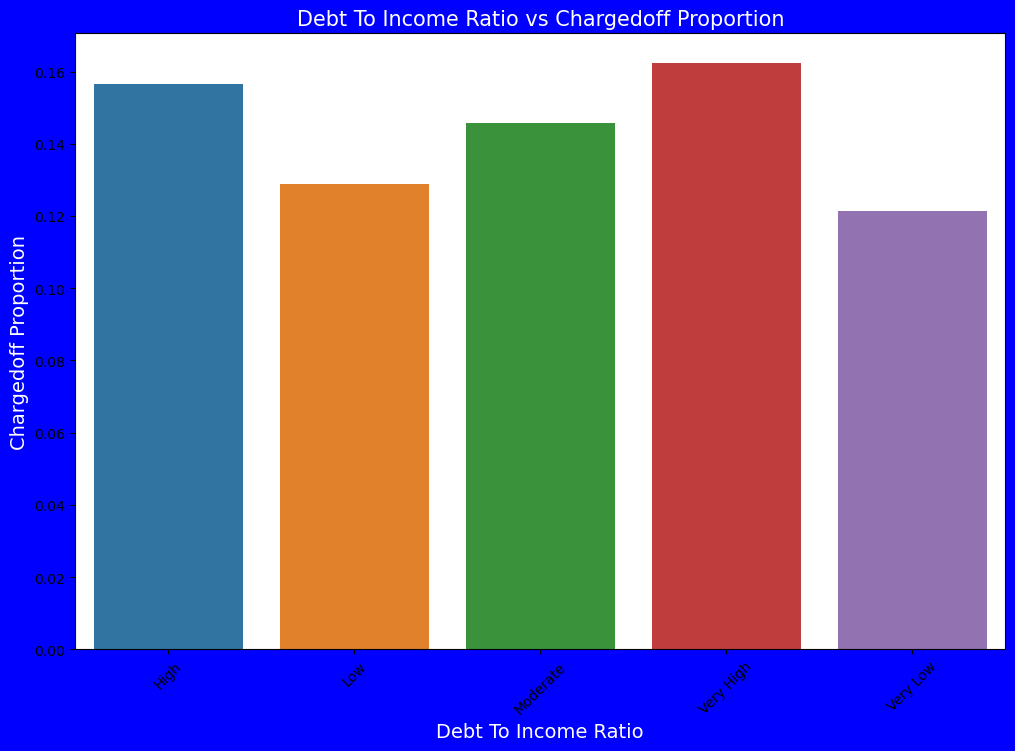

In [100]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Debt To Income Ratio vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='dti_b', y='Chargedoff_Proportion', data=dti_vs_loan)
ax1.set_xlabel('Debt To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

### Observation:
- High DTI value  having high risk of defaults
- Lower the DTO having low chances loan defaults.

In [101]:
loan_data['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    31606
1.0     1445
2.0        5
Name: count, dtype: int64

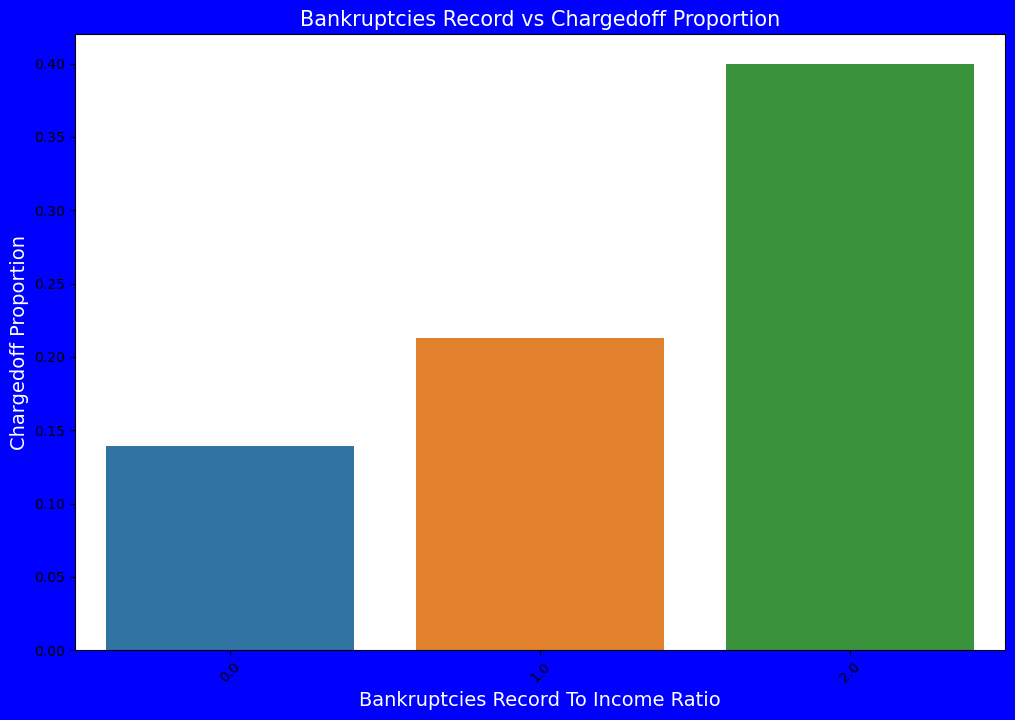

In [103]:
# #Bivariate Analysis on Bankruptcies Record against Chargedoff_Proportion -
pub_rec_bankruptcies_vs_loan = loan_data.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Bankruptcies Record vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=pub_rec_bankruptcies_vs_loan)
ax1.set_xlabel('Bankruptcies Record To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

### Observations:
- Bankruptcies Record with 2 is having high impact on loan defaults
- Bankruptcies Record with 0 is low impact on loan defaults
- Lower the Bankruptcies lower the risk.

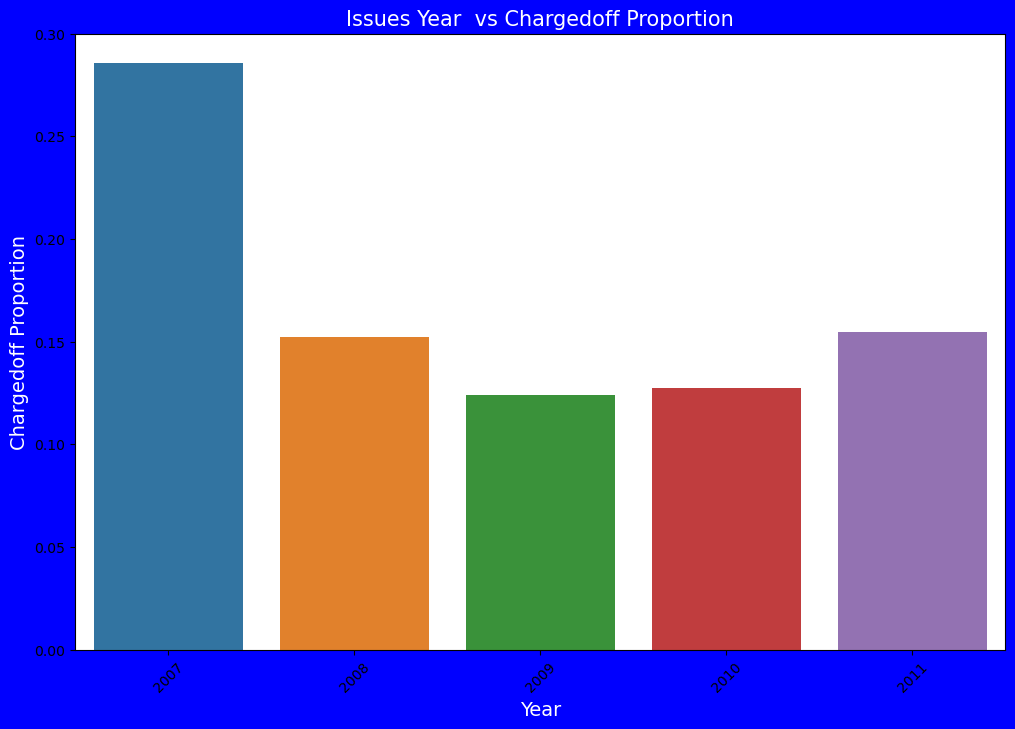

In [104]:
# #Bivariate Analysis on Issues of Year  against Chargedoff_Proportion -

issue_year_vs_loan = loan_data.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off']+ issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Issues Year  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='issue_year', y='Chargedoff_Proportion', data=issue_year_vs_loan)
ax1.set_xlabel('Year',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

  - Year 2007 is highest loan defaults.
  - 2009 is having lowest loan defaults.

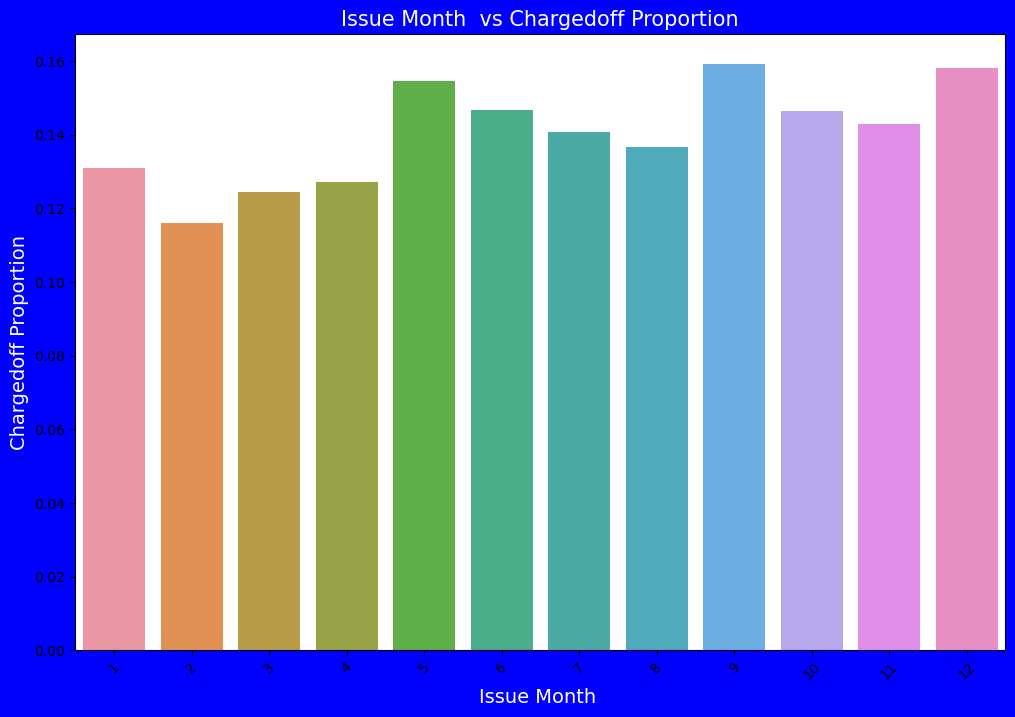

In [105]:
# #Bivariate Analysis on Month of Issue of loan Record against Chargedoff_Proportion -

issue_month_vs_loan = loan_data.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off']+ issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Issue Month  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='issue_month', y='Chargedoff_Proportion', data=issue_month_vs_loan)
ax1.set_xlabel('Issue Month ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

- Those loan has been issued in May, September and december is having high number of loan defaults
- Those loan has been issued in month of February is having high number of loan defaults
- Majority of loan defaults comig from applicants whose loan has been aprroved from September-to Deceber

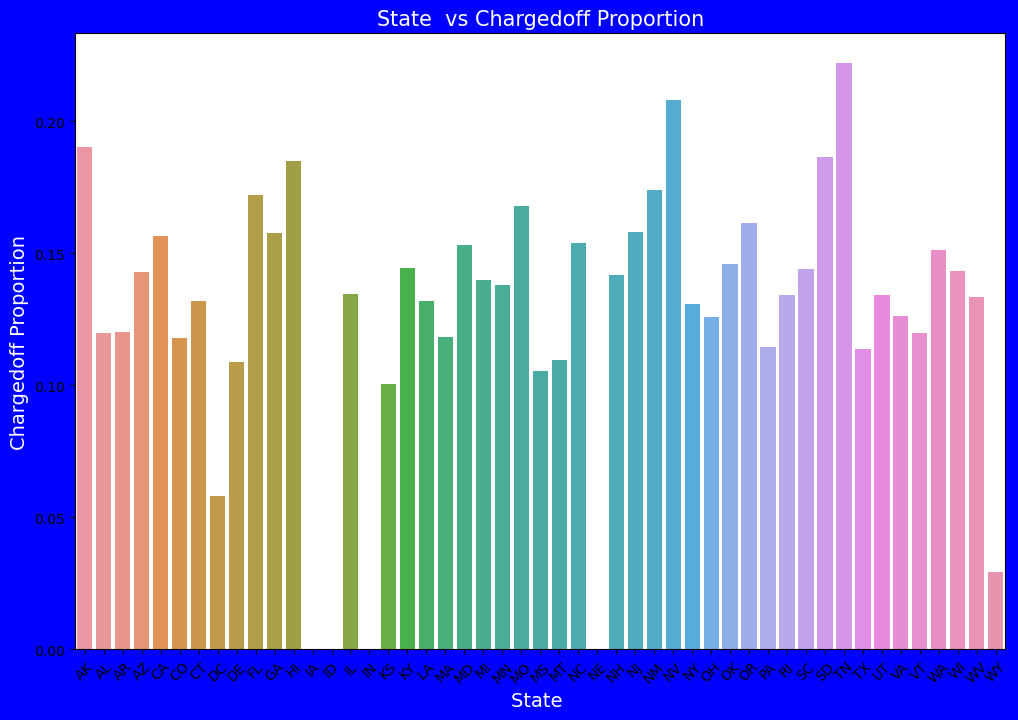

In [106]:
# #Bivariate Analysis on Address state  against Chargedoff_Proportion -

addr_state_vs_loan = loan_data.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off']+ addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('State  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan)
ax1.set_xlabel('State ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

- DE States is holding highest number of loan defaults.
- CA is having low number of loan defaults

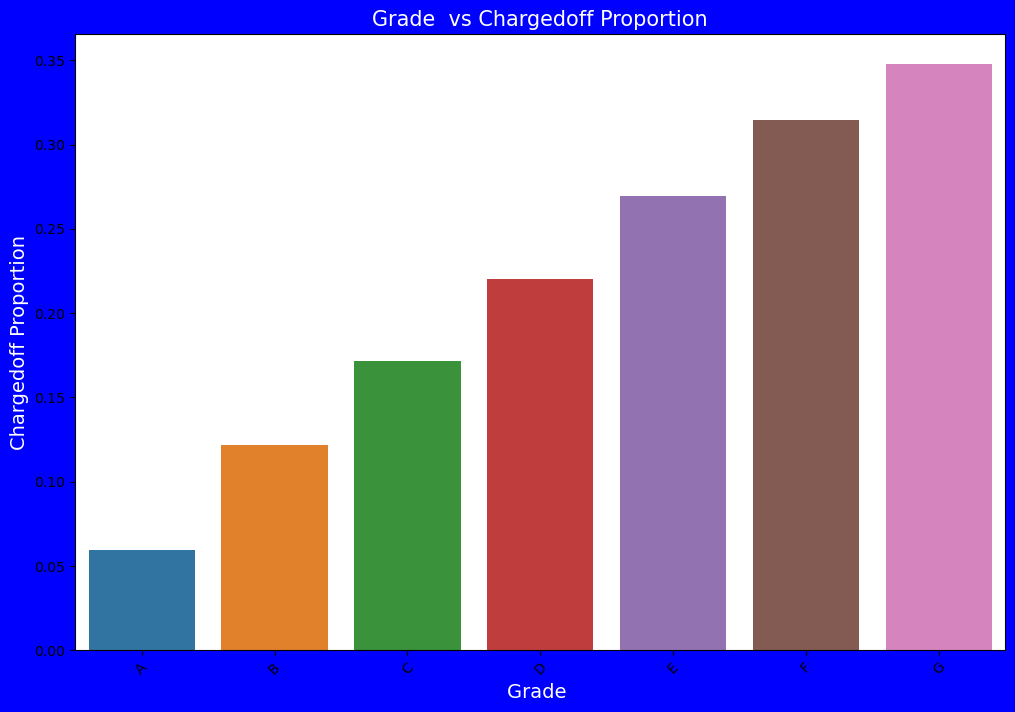

In [107]:
# #Bivariate Analysis on Grade against Chargedoff_Proportion -

grade_vs_loan = loan_data.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']+ grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Grade  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grade ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

- The Loan applicants with loan Grade G is having higest Loan Defaults.
- The Loan applicants with loan A is having lowest Loan Defaults.

## 15. Correlation Analysis